# CREDIT CARD FRAUD DETECTION

> ## Fraud Classification and Anomaly Detection with Neural Networks

> *By Fiammetta Caccavale & Rasmus Kær Jørgensen*




### INTRODUCTION

The risk of fraud for financial services companies and their customers have dramatically increased in the last years by advancements in computing technologies and the expanding use of e-commerce platforms. The failure of identifying and prevent fraud is costing the industry billions of dollars per year, as estimated in a recent Nilson Report [1]. It is estimated that loss due to credit card fraud would top $27.69 billion in 2017, with an increase of 11% over the previous year [2].
Financial companies are now trying to find a solution to better protect themselves. Traditional approaches to detect credit card fraud are rule-based, employing a set of logic statements to query transactions and flag suspicious activity for human review. The disadvantage of these methods is that the rules can be so generalized that they cause millions of legitimate transactions to be turned away or declined. There is evidence that this approach is not as effective at detecting and exposing new fraudulent techniques in real-time [2]. Many AI techniques, including deep learning, are becoming increasingly popular and effective to solve this issue. The advantage of using deep learning algorithms is that they can quickly learn and analyze vast quantities of data and uncover anomalies, which are patterns in data that do not conform to a well-defined notion of normal behavior [3], or suspicious patterns in transactions [2]. 


### MOTIVATION AND BACKGROUND 

The aim of our study is to provide a contribution to the credit card fraud issue, by classifying transactions and discern fraudulent from genuine transactions in a highly imbalanced dataset.
In order to achieve this, we will implement different Deep Learning approaches and techniques to detect fraud in the Credit Card Fraud Dataset [4].

The [Credit Card Fraud Detection problem](https://www.kaggle.com/dalpozz/creditcardfraud) is a year-old Kaggle dataset ("competition") that has gained much attention and interest. The problem is to classify transactions and discern fraudulent from genuine transactions in a highly imbalanced dataset (0.17% fraudulent vs 99.83% genuine). 

Afterwards, we will compare the approaches and assess their performance. The discussion of the approaches will be further developed in the *report* **[insert referentce]**. 
We will then try to infer what might have made these approaches successful and explain why other models did not achieve good results. Finally, we will quantify and illustrate the effects of the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR) using ROC and Confusion Matrix, and discuss the results.

### MILESTONES & OBJECTIVES/ AIM 

- Introducing fraud detection as a problem.
- Data Understanding: understand and describe the dataset.
- Methods: compare 5 different approaches to solve the problem. 
- Model Performance: analyze and discuss the performance of the various approaches. 


### DATA

**Credit Card Fraud Detection**: anonymized credit card transactions labeled as fraudulent or genuine
> You can find the link to the competition here: https://www.kaggle.com/dalpozz/creditcardfraud 


>The following is the description provided:

>>*"The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.*

>>*It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise."* [4]

### METHOD

We propose an empirical comparison of different Deep Learning methods to solve the credit card fraud problem.

Implemented deep learning approaches:
- **0. Simple Logistic Regression** *(for baseline measure)*

- **1. Feedforward network with over-sampling (SMOTE)**

- **2. Feedforward network with under-sampling (RandomUndersampling)**

- **3. Feedforward network with a combination of SMOTE and Edited Nearest Neighbor (SMOTE + ENN)**

- **4. Deep Neural Network**

- **5. Autoencoder**



### CHALLENGES
Several factors make the Credit Card Fraud Detection a challenging problem [(Chandola, V., 2009)](http://cucis.ece.northwestern.edu/projects/DMS/publications/AnomalyDetection.pdf) [3]: 

> - Defining a ‘normal’ is very difficult. The boundary between normal and anomalous behavior is often not precise. An anomalous observation which lies close to the boundary can actually labelled as normal, and vice-versa.


> - Anomalies can be the result of malicious actions, thereby making the task of defining normal behavior more difficult.


> - Normal behavior keeps evolving, especially for credit card usage and a current notion of normal behavior might not be sufficiently representative in the future.


> - Often the data contains noise which tends to be similar to the actual anomalies and hence is difficult to distinguish and remove.


> - Imbalanced class distribution. The dataset can be extremely imbalanced and lack in important information.


> - Anomaly detection and credit card fraud classification problems, are not easy to solve. 

# EVALUATION METRICS


**Introduction to ROC curve**

Accuracy score is often the first evaluation metrics that comes to mind: it is easy to calculate and effective in most of the cases. An accurate reflection about our problem will, on the other hand, surely lead to the conclusion that accuracy is not the optimal metric to be used. We can explain the reason behind this decision with a simple example: imagine we are working with our dataset, which presents 90% of instances belonging to class 1 and 10% belonging to class 2. We can create a classification model which retrieves 90% accuracy. At first glance, the classifier appears to work perfectly, since we can assume that 90% of accuracy is a good result. But diving a little deeper into the problem leads us to realize that the classifier reaches that score only by predicting one class, the majority class. Therefore, we have to conclude that this way of handling our problem might not be the most optimal.

*The metrics used to evaluate our models is the ROC curve*. The increase of the ROC graphs in machine learning in the recent years is partly due to the realization that simple classification accuracy is often not the optimal metric for measuring performance [5-6]. Moreover, this metric is particularly useful for datasets with skewed class distribution and unequal classification error costs [7].

**What is conveys?**
A ROC curve is used to depict the trade-off between hit rates (also called true positive rate and recall) and false alarm rates (false positive rate) of classifiers [8-9]. More specifically, ROC curve is a plot of the true positive rate on the y axis versus the false positive rate on the x axis for every possible classification threshold [10].

AUC is the area under the curve. A poor classifier has a AUC of around 0.5, which is random guessing, while the closer to 1 is the AUC, the better is the classifier.

The true positive rate (TPR) is the result of the question: when the actual classification is positive, how often does the classifier predicts positive? It is, in fact, the fraction of the true positives and all the positives. the false positive rate (FPR) is the answer to the question: when the actual classification is negative, how often does the classifier incorrectly predicts positive? The FPR is the fraction between the false positives and all the negatives.
Trade-off between precision and recall: in our case, we are more interested in the recall accuracy, since it is more relevant to capture a higher number of fraudulent transactions than misclassify few more genuine transactions.

## DEPENDENCIES AND SUPPORTING FUNCTIONS
Load all dependancies and supporting functions by running the code block below.

In [1]:
from __future__ import absolute_import, division, print_function 

import sys
import os
sys.path.append(os.path.join('.', '..')) 

from datetime import datetime 
import pickle
from pylab import rcParams

## stats and numerical
import pandas as pd
import numpy as np
from scipy import stats

## plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
# import seaborn as sns
from sklearn.manifold import TSNE

## logistic regression
from sklearn.linear_model import LogisticRegression

# Tensorflow
import tensorflow as tf

# Metrics, preprocessing and ...
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle as sk_shuffle
from numpy.random import shuffle

# supporting functions
from get_functions import get_confusion_matrix, get_evaluation_stats, get_plot_ROC,get_plot_roc_thres
import utils_tf, utils
tf.__version__

'1.3.0'

# DATA EXPLORATION

We can interpret our problem to be an **anomaly detection problem**, where the minority class can be seen as anomalies, or outliers.

Therefore, before starting our analysis and exploring the data, we have to define what anomaly is. In fact, our dataset is highly imbalanced, which means that we have a large quantity of observations for one class, while the data for the other class is very scarce [3].

"Anomalies are patterns in data that do not conform to a well defined notion of normal behavior" (Chandola et al, 2009) [3].

We can think of these patterns as data coming from another generating process than the one most observations came from [11].




### PRESENTING THE DATA

In [2]:
df = pd.read_csv('../data/creditcard.csv')
print("The dataset consists of %i transactions and %i features." % (df.shape[0], df.shape[1]))
df.head()

The dataset consists of 284807 transactions and 31 features.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### MORE DESCRIPTIVE 
Some descriptive stats about the dataset

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### TIME

The dataset spans over: 2 days. 



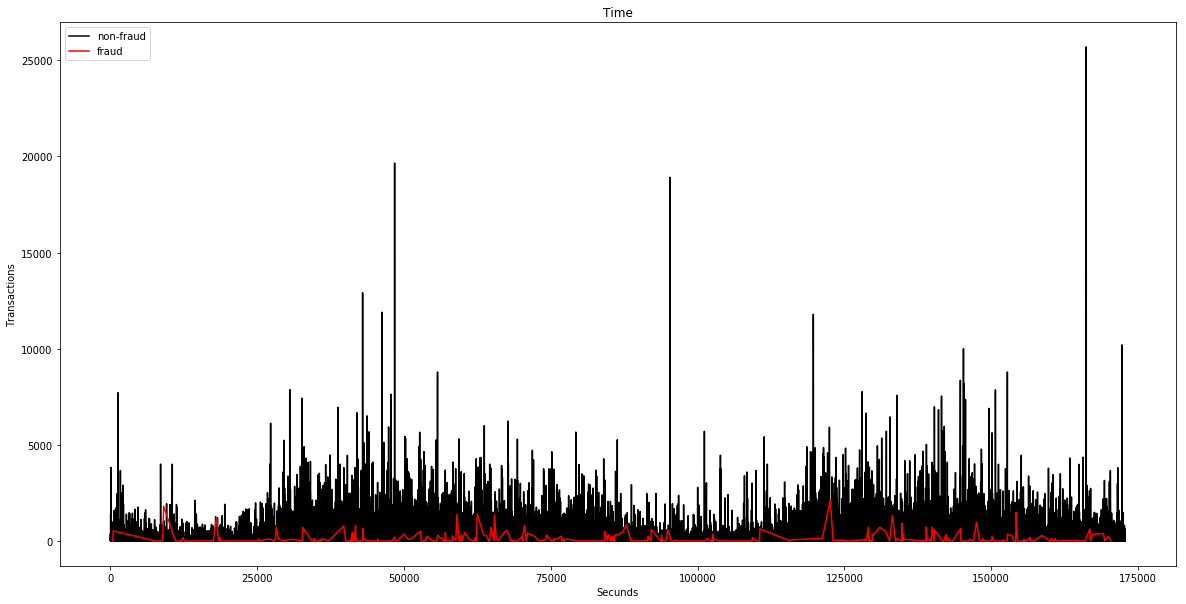

In [6]:
print("The dataset spans over: %i days. \n" % ((df['Time'].max() / (3600 * 24.0)).round()))
plt.figure(figsize=(20,10))
plt.plot(df[df.Class==0]['Time'],df[df.Class==0]['Amount'],color='black', label='non-fraud')
plt.plot(df[df.Class==1]['Time'],df[df.Class==1]['Amount'],color='red', label='fraud')
plt.title('Time')
plt.xlabel('Secunds')
plt.ylabel('Transactions')
plt.legend(); plt.show()

The <span style="color:red"> red line</span> shows the fraudulent transaction and the **black line** shows the normal/ non-fraudulent transaction.

#### CLASS IMBALANCE

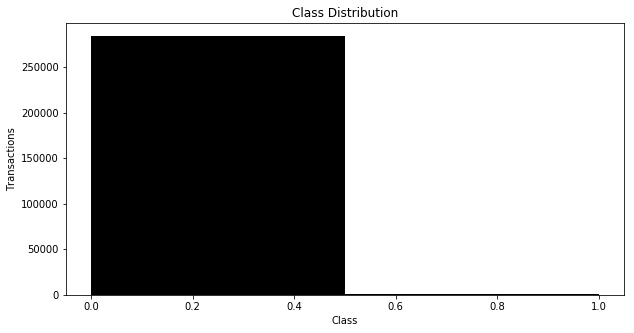

Out of the total examples of 284807 
 284315 are non-fraud cases 
 492 are fraud cases

 Percentage of fraud counts in the dataset: 0.173 
 Percentage of non-fraud counts in dataset: 99.827


In [7]:
plt.figure(figsize=(10,5))
plt.hist(df['Class'], color='black', bins=2)
plt.title('Class Distribution')
plt.xlabel('Class');plt.ylabel('Transactions')
plt.legend();plt.show()
print("Out of the total examples of %i \n %i are non-fraud cases \n %i are fraud cases" % (
    df.shape[0], len(df[df.Class==0]), len(df[df.Class==1])))
print("\n Percentage of fraud counts in the dataset: %0.3f \n Percentage of non-fraud counts in dataset: %0.3f" % (((len(df[df.Class==1])*100)/(len(df[df.Class==0])+len(df[df.Class==1]))), ((len(df[df.Class==0])*100)/(len(df[df.Class==1])+len(df[df.Class==0])))))

The histogram is not very informative, but it illustrates the relation between the two classes.



## VIZUALIZING THE DATA WITH T-SNE

Since we are working with high-dimensional data, we need to find a way to visualize the datapoints, in order to gain more knowledge about their distribution and the dataset in general. The method chosen in our study is **T-SNEE**, since it tends to preserve local structures and simultaneously tries to preserve the global structure [12].

**DESCRIPTION OF T-SNE (t-distribution Stochastic Neighbor Embedding)**

Given a collection *N* with high-dimensional objects, t-SNE is useful to visualize how the objects are arranged in the data space.

It takes a high-dimensional dataset and reduces it to a low-dimensional graph, preserving the clustering of the high-dimensional space.

It aims to match distribution of distances between points in high and low dimensional space via conditional probability. If two points are close to each other, the conditional probability of two points is going to be large, while if they are far apart from each other, it is going to be close to 0. The aim is to reduce the distance between the conditional probability of two points in the higher space and the conditional probability of two points in the lower space, so that when we project the two points, we maintain the same (relative) distances between points.

Perplexity is a measure of numbers of close neighbors of each point.


>**Why we use the t-Student with one degree of freedom (or Cauchy) distribution for the map points**

>The distance between the data points, which are the points in the original data space, is calculated by using a Gaussian distribution, while for map points, which are points in the map space (the low-dimensional graph we want to reduce the high-dimensional dataset to) the distance is calculated by using a t-Student with one degree of freedom (or Cauchy) distribution [12]. 

>If we use a Gaussian distribution both when calculating the distance between the points in the high-dimensional space and in the low-dimensional space, we would have an imbalance in the distribution of the distances of a point's neighbors.
This is due to the fact that the distribution of the distances is very different between a high-dimensional space and a low-dimensional space. 
What would happen is that the algorithm would try to reproduce the same distances in the two spaces. The result would lead to an excess of attraction forces and a sometimes unappealing mapping (this is actually what happens in the original SNE algorithm) [12-13].

>The t-SNE algorithm tries to handle this problem by using a t-Student with one degree of freedom (or Cauchy) distribution for the points projected into the low-dimension representation. 
This distribution has a much heavier tail than the Gaussian distribution, which compensates the original imbalance. 
In fact, two map points have to be much further apart than the two given data points in order for their similarity to match the data similarity [12]. 



In [21]:
def visualizing_with_TSNE(N, dataframe):
    '''t-distributed Stochastic Neighbor Embedding.'''
    #Code adapted from PredictingFraudWithTensorFlow by Currie32
    #Source: https://www.kaggle.com/currie32/predicting-fraud-with-tensorflow/comments
    #Set df equal to all of the fraulent and normal transactions.
    df2 = pd.concat([dataframe[dataframe.Class == 1], dataframe[dataframe.Class == 0].sample(n = N)], axis = 0)
   
    #Scale features to improve the training ability of TSNE.
    standard_scaler = StandardScaler()
    df2_std = standard_scaler.fit_transform(df2)

    #Set y equal to the target values.
    y = df2.ix[:,-1].values
    tsne = TSNE(n_components=2, random_state=0)
    x_test_2d = tsne.fit_transform(df2_std)
    
    #Build the scatter plot with the two types of transactions.
    color_map = {0:'red', 1:'blue'}
    plt.figure(figsize=(15,10))
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x_test_2d[y==cl,0],y = x_test_2d[y==cl,1], 
                    c = color_map[idx],label = cl)
    plt.xlabel('X, t-SNE');plt.ylabel('Y, t-SNE');plt.legend(loc='upper left')
    plt.title('t-SNE data visualization');plt.show()
    
    # REFERENCE TO Currie32_PredictingFraudWithTensorFlow

def visualizing_with_TSNE_sampled(N, x, y):
    '''t-distributed Stochastic Neighbor Embedding.'''
    #Code adapted from PredictingFraudWithTensorFlow by Currie32
    #Source: https://www.kaggle.com/currie32/predicting-fraud-with-tensorflow/comments
    dataframe = pd.DataFrame(x)
    dataframe['Class'] = y
    
    #Set df equal to all of the fraulent and normal transactions.
    df2 = pd.concat([dataframe[dataframe.Class == 1].sample(n = N), dataframe[dataframe.Class == 0].sample(n = N)], axis = 0)
   
    #Scale features to improve the training ability of TSNE.
    standard_scaler = StandardScaler()
    df2_std = standard_scaler.fit_transform(df2)

    #Set y equal to the target values.
    y = df2.ix[:,-1].values
    tsne = TSNE(n_components=2, random_state=0)
    x_test_2d = tsne.fit_transform(df2_std)
    
    #Build the scatter plot with the two types of transactions.
    color_map = {0:'red', 1:'blue'}
    plt.figure(figsize=(15,10))
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x_test_2d[y==cl,0],y = x_test_2d[y==cl,1], 
                    c = color_map[idx],label = cl)
    plt.xlabel('X, t-SNE');plt.ylabel('Y, t-SNE');plt.legend(loc='upper left')
    plt.title('t-SNE data visualization');plt.show()


#### PLOT OF 100 000 DATAPOINTS

/home/rkr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


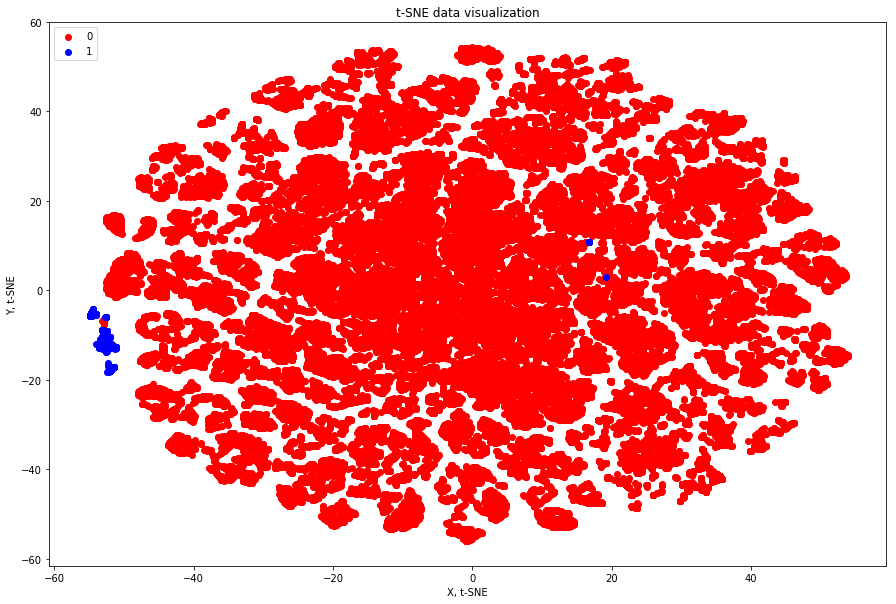

In [112]:
N = 100000
visualizing_with_TSNE(N, df)

#### PLOT OF ALL DATAPOINTS

/home/rkr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


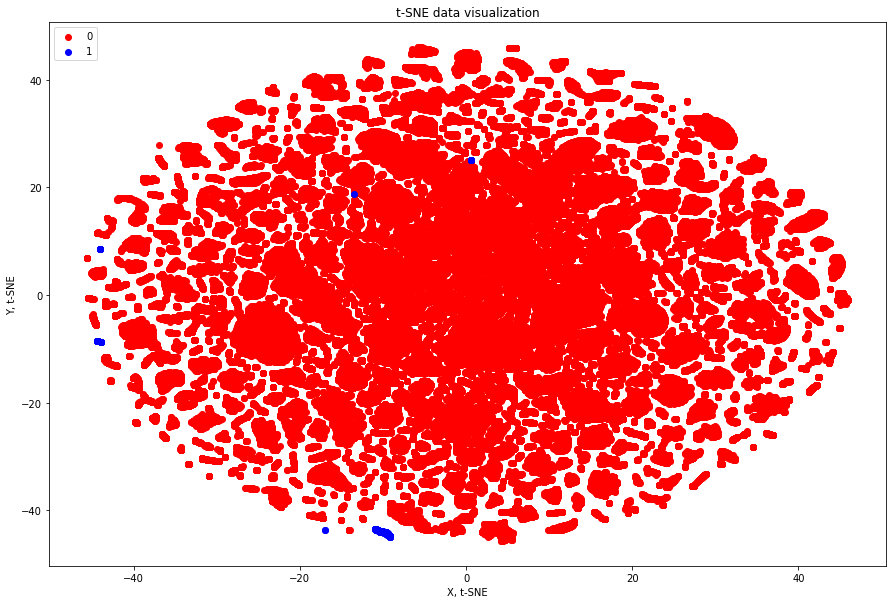

In [13]:
N = 284807-492
visualizing_with_TSNE(N, df)

*The t-SNE visualization is a great method to explore and get an intuition on the data.*

We can see that <span style="color:blue">the fraudulent transactions </span> group in 6 clusters, 4 of the which are in the "outer ring", whereas 2 groups are overlapping with <span style="color:red">the non-fraudulent transactions</span>. 

The plot shows that we should have a fair chance for discriminating some of the fraudulent groups from the non-fraudulent. 

### PLOT OF TEST DATA

*The data is split by 80/20*
> **The training data consistes of 80 % of the data.**

> **The test data consists of 20 % of the data. **

### All approches will be validated on the same test data. The data is shown below.

/home/rkr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


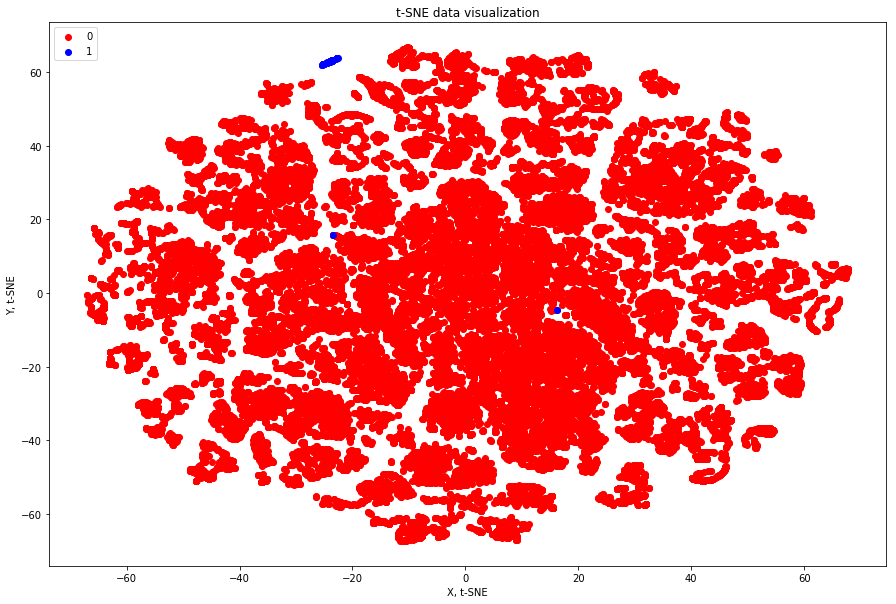

In [263]:
# T-SNE of test data
x_train, y_train, x_test, y_test = get_data(test_ratio=TEST_SIZE, seed=RANDOM_SEED) # load data
dataframe_testdata = pd.DataFrame(x_test) # create dataframe
dataframe_testdata['Class'] = y_test
N_testdata = len(x_test)-91 # set N
visualizing_with_TSNE(N_testdata, dataframe_testdata) # T-SNE

#### INVESTIGATING THE CLASSES
> The T-SNE allowed a better visualization of the dataset. We can observe that <span style="color:blue">the fraudulent transactions </span> represent a very small fraction of the whole sample *N*. Moreover, fraudulent transactions tends to be grouped in the same area: this is a remarkable information, since it means that the features of these transactions differ from <span style="color:red">the non-fraudulent transactions</span>, but also share some characteristics. 

> Handling the problem of imbalanced data is quite hard, so also having to deal with the issue of overlapping classes would increase the complexity of the problem we try to solve in this study.

> Luckily, the classes are fairly grouped. This gives us a good indication for being able to model a classifier that is able to discriminate between the two classes.

*Notice: We have only used a small sample N of the total 284 315 transactions. It would have been preferred to use all the transactions, but it is computationally too heavy for a laptop. 
Nevertheless, the plot gives us some accurate information about the data, but a fair share of information is still missing.* 

# DATA PREPROCESSING & LOADING DATA

In [25]:
# define
RANDOM_SEED = 48
TEST_SIZE = 0.2 # 80/20 split

def get_data(test_ratio, seed):
    ''' loading, preprocessing and splittilng data'''

    random_seed = seed
    dataframe = sk_shuffle(pd.read_csv('../data/creditcard.csv'),random_state=random_seed) # load data
    
    # standardize features by removing the mean and scaling to unit variance
    dataframe['Amount'] = StandardScaler().fit_transform(
        dataframe['Amount'].values.reshape(-1, 1))    
    dataframe['Time'] = StandardScaler().fit_transform(
        dataframe['Time'].values.reshape(-1, 1))
    
    # split data in test and train
    idx = int((1-test_ratio) * dataframe.shape[0])
    x_test = dataframe.iloc[idx:, 1:-2].values
    y_test = dataframe.iloc[idx:, -1].values
    x_train = dataframe.iloc[:idx, 1:-2].values
    y_train = dataframe.iloc[:idx, -1].values

    return x_train, y_train, x_test, y_test

_, _, _, _ = get_data(test_ratio=TEST_SIZE, seed=RANDOM_SEED)
print('function for data preprocessing & loading data')

function for data preprocessing & loading data


# 0. DEFAULT BASELINE MODEL
> ## LOGISTIC REGRESSION AS BASELINE


In order to assess the performance of our models, we chose a Logistic Regression implementation from Sklearn [14] as baseline. Benchmarking against logistic regression provide a method for comparing the performance of the various approaches across different architectures. 

There are five reasons for choosing SKlearn's built-in implementation of logistic regression and not to implement our own:
1. Sklearn has a really good implementation
2. We cannot 'tweak' the model to our favor in order to make our networks look better
3. To provide an objective assessment the models and if it makes sense to go for more advanced methods
4. Sklearn's logistic regression could seem like the choice less experienced practitioners would go with
5. Logistic regression is a simple model well-suited for binary classification


The method we implemented is a simple **Logistic Regression**, which we will successively use as baseline for the networks implemented below. We deliberately do not tune parameters, since we want to have a model as pure and simple as possible.

In [12]:
def Logistic_Regression(X_train, y_train, X_test, y_test):
    ''' Logistic Regression classifier '''
    
    print('\n Running Logistic Regression classifier \n')
    regr = LogisticRegression()
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)

    return y_test, pred

#### DATA
> **For training:** 401 fraud cases and 227444 non-fraud cases

> **For test:** 91 fraud cases and 56871 non-fraud cases




 Running Logistic Regression classifier 



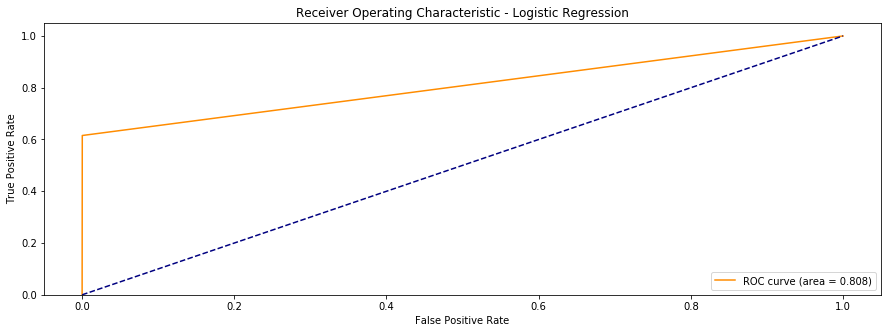

In [13]:
X_train_LogReg, y_train_LogReg, X_test_LogReg, y_test_LogReg = get_data(TEST_SIZE,RANDOM_SEED) # load data 
y_test_LogReg, pred_LogReg = Logistic_Regression(
    X_train_LogReg, y_train_LogReg, X_test_LogReg, y_test_LogReg) # classification
get_plot_ROC(y_test_LogReg, pred_LogReg, 'Logistic Regression') # evaluation

> *The goal is to achieve a high area under ROC Curve on the validation set. ROC AUC is a good indicator of performance when one is working with a highly unbalanced dataset. The logistic regression scored a AUC of 0.808, which we will use as baseline measure.*

### <span style="color:blue"> BASELINE TO BEAT:
> ### Area Under Curve = 0.808
</span>



As we can see from the ROC curve obtains an AUC of 0.808. Although its performance seems quite high, this simple model seems not to be the optimal one. Tuning the parameter would have definitely increased the performance, but the aim of this classifier is not to be competitive, but to serve as baseline. The precision and recall scores achieved depend on the ratio of the correct instances: the precision is, in fact, calculated by dividing the number of true positive by the sum of the positive predictions (true positive and false positive). 


# SUPERVISED FRAUD DETECTION 

> *“Techniques trained in supervised mode assume the availability of a training data set which has labeled instances for normal as well as anomaly class.“* (Chandola, V., 2009) [3]

The approach we will take is to build a predictive model the will perform a binary classification between normal versus anomaly classes. The model will be validated by using unseen test data to test the models' ability to determine in which class each instance belongs to.

A major issue in supervised fraud detection is the imbalanced class distribution. Anomalous instances are far fewer compared to the normal instances in the training data. Obtaining an accurate representation of the anomalous class is a challenge.  (Chandola, V., 2009) [3].

We will assess the effectiveness of different sampling techniques to counter the imbalanced class distribution. 

##  FEED FORWARD NEURAL NETWORK WITH TENSORFLOW


> Deep learning provides a powerful framework for supervised learning. In classification tasks, the goal is to map an input vector to an output vector. This task can be fulfilled by a person with domain expertise, but would be extremely time consuming and prone to human-errors. A neural network can rapidly accomplish this task if given suﬃciently large model and suﬃciently large datasets of labeled training examples [(DeepLearningBook, Goodfellow et al, p. 163 ).](http://www.deeplearningbook.org/contents/part_practical.html) [15].


In general terms, the goal of supervised learning with a feedforward neural network is to approximate a function, $f$. We want to learn a classifier, $y=f(x)$ to map an input $x$ of transactions to a $y$ of classes. In a feedforward neural network it is defined as mapping $y=f(x;\theta)$. The best function approximation is found by learning the value of the parameters $\theta$.

According to the [Universal approximation theorem by Cybenko (1989)](http://www.deeplearningbook.org/contents/mlp.html) [16], a feedforward neural network with 1 hidden layer can approximate any function, provided the network is given sufficient hidden units. Thus, should be able to learn any 'learnable' fraud classification task. 


Tensorflow provides us the building blocks of variables and operations such that we can form computational graphs.

## SAMPLING TECHNIQUES


**Introduction**  

Usually, the performance of machine learning algorithms or neural networks is evaluated using predictive accuracy. A problem might arise when the data is imbalanced: in our example, a basic classifier would predict the correct outcome with an accuracy of 99% simply by using a default strategy of guessing only the majority class. 

However, the nature of our investigation (predicting fraudulent transactions), requires a fairly high rate of correct detection in the minority class. Therefore, simple predictive accuracy is not the optimal strategy in such a case [10].


According to the literature, there are two good strategies to handle class imbalance: one is to assign distinct costs to training examples [17-18], the second is to use re-sampling techniques [10]. We decided to follow this second strategy and have focus on SMOTE based over-sampling and random under-sampling for rebalancing the dataset.

> Consequently, under-sampling can lead to a loss of information, whereas over-sampling can lead to unwhised noisy in the dataset.  

We will try to handle the problem of having an imbalanced data by re-sampling our original dataset in three ways:

>In the first example we **over-sample the minority class with SMOTE**.

>In the next example we **under-sample the majority class**.

>In the last example, we combine the two previously mentioned techniques: **we combine SMOTE over-sampling with under-sampling**, which is found in the literature to be a very effective method.

**What are oversampling and undersampling and why do we try both approaches?**

The aim of oversampling is to increase the number of instances of the minority class in the training set.
The advantage of this approach is that no information from the original training set is lost, since both the members of the minority class and the instances of the majority class are kept. The disadvantage is that the size of the training set is greatly increased: this may implicate an increase in training time and amount of memory required to hold the training set.
Since our dataset is high dimensional, we need to keep time and memory complexity under reasonable constraints [19].

Undersampling seeks to reduce the number of majority class instances in the training set. If we only take into consideration time and memory consumption, then undersampling would be preferable to oversampling. Past studies have not reached any unanimous opinion with regards to whether undersampling or oversampling is to be considered a better technique. The conclusion reached is that conflicting results are due to the combination of different datasets and classification algorithms. Moreover, the choice of which resampling technique should be used is probably both domain and problem specific [19].


### STOCHASTIC GRADIENT DESCENT WITH MINI-BATCHES 

Batch sizes may vary a lot depending on application. We have used batch sizes from 48 to 10000 in this project and found batch_size > 8000 to be very efficient for our networks. At first, we were skeptical since the most common batches sizes used are between 8-256.
Recall that the imbalance is at a ratio of 99.83:0.17, therefore small batch sizes may approximate towards the majority class. While larger batch sizes will compute more general gradients and update our parameters on a broader and larger sample. This also revealed to be favorable for the sample-manipulated data.
The only case where we kept a relatively low batch size was for the under-sampled network, in which the dataset consists of around 800 instances. 

On the other hand, the choice of employing larger batch size is consequently costlier for memory usage and slower convergence. 

For gradient-based optimization we have mainly made use of Tensorflows AdamOptimizer [20] (adaptive moment estimation) with varying learning rates. 


# 1. FEEDFORWARD NEURAL NETWORK 
> ## WITH SYNTHETIC MINORITY OVER-SAMPLING (SMOTE)


-----


We implement a **Feedforward Neural Network** and, to increase the perform of our model, we manipulate the data through SMOTE over-sampling technique.

Before the discovery of this method, over-sampling with replacement was used to manipulate the original data.


### HYPOTHESIS
> *The strategy is to apply over-sampling to fight the class imbalance.*

>>-  A feedforward neural network with synthetic minority over-sampling (SMOTE) will perform superior than simple logistic regression.  


>>- Rebalancing the dataset by creating synthetic observations from the minority class will make learning more effective given the increased fraud-class and increase the feasibility of generalizing well on the test data.


**CONSIDERATIONS:**


>In this case, we will rebalance the dataset by over-sampling from 401 to 227444 cases in the minority class. 
>>So the questions is, will the strong over-sampling end up introducing noise to the learning or be able to keep a accurate over-sampling of the minority class?

#### CREATE SYNTHETIC OBSERVATIONS FROM MINORITY CLASS




- **SMOTE (Synthetic Minority Over-sampling TEchnique) is an over-sampling technique in which the minority class is over-sampled by creating 'synthetic' examples**. It aims to enrich the minority class boundaries by introducing artificial examples in the minority class rather than replicating already existing examples to avoid the problem of overfitting [21]. The synthetic examples are generated by operating in the "feature space" rather than in the "data space". 

>*"The minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any /all of the *k* minority class nearest neighbors"* (Chawla et al. 2002) [10].

- **How are synthetic samples generated - formal definition:**

>*"Take the difference between the feature vector (sample) under consideration and its nearest neighbor. Multiply the difference by a random number between 0 and 1, and add it to the feature vector under consideration. This causes the selection of a random point along the line segment between two specific features"* (Chawla et al. 2002) [10].


Steps of the SMOTE over-sampling technique to create synthetic observations of the minority class:

- Find the K-Nearest Neighbors for minority class observations (find similar observations)
- Randomly choose one of the k-nearest-neighbors and use it to create a similar, but randomly tweaked, new observation [22].

Note: it is remarkable to mention that a over-sampling correctly is fundamental: in fact, the data has to be divided into training and test set before over-sampling and we have to over-sample only on the training data. In this way, none of the information in the validation data is being used to create synthetic observations. So, these results should be generalizable [22]. 



#### DATA PREPROCESSING & LOADING DATA

In [37]:
dataset_smote = pd.read_csv('../data/creditcard.csv')
x_train_smote, y_train_smote, x_test_smote, y_test_smote = get_data(
                                                            TEST_SIZE, RANDOM_SEED)
#Percentage of fraudlent records in original data
print("Total examples: %i, total fraud cases: %i." % (
    dataset_smote.shape[0], (np.sum(y_train_smote)+sum(y_test_smote))),"\n")
print('Percentage of fraud counts in original dataset: %0.3f' % (
    (len(dataset_smote[dataset_smote.Class==1])*100)/(len(dataset_smote[dataset_smote.Class==0])+
                                              len(dataset_smote[dataset_smote.Class==1]))))

print("Total train examples: %i, total fraud cases: %i, equal to %0.5f of total cases. " % (
    x_train_smote.shape[0], np.sum(y_train_smote), np.sum(y_train_smote)/x_train_smote.shape[0]))

print("Total test examples: %i, total fraud cases: %i, equal to %0.5f of total cases. " % (
    x_test_smote.shape[0], np.sum(y_test_smote), np.sum(y_test_smote)/y_test_smote.shape[0]))

Total examples: 284807, total fraud cases: 492. 

Percentage of fraud counts in original dataset: 0.173
Total train examples: 227845, total fraud cases: 401, equal to 0.00176 of total cases. 
Total test examples: 56962, total fraud cases: 91, equal to 0.00160 of total cases. 


In [38]:
#Apply SMOTE to create synthetic observations from minority class
#Source:https://github.com/scikit-learn-contrib/imbalanced-learn

from imblearn.over_sampling import SMOTE #Over sampling
sm = SMOTE(random_state=RANDOM_SEED)
X_sampled_smote,y_sampled_smote = sm.fit_sample(x_train_smote,y_train_smote.ravel())

# overwriting / input for network
x_train_smote = X_sampled_smote
y_train_smote = y_sampled_smote

# describe the data 
print("After sampling:\n")
print("Total examples: %i total fraud cases: %i." % (
    (x_train_smote.shape[0]+x_test_smote.shape[0]), (np.sum(y_train_smote)+sum(y_test_smote))),"\n")
print("Total train examples: %i, total fraud cases: %i, equal to %0.5f of total cases. " % (
    x_train_smote.shape[0], np.sum(y_train_smote), np.sum(y_train_smote)/x_train_smote.shape[0]))
print("Total test examples: %i, total fraud cases: %i, equal to %0.5f of total cases. " % (
    x_test_smote.shape[0], np.sum(y_test_smote), np.sum(y_test_smote)/y_test_smote.shape[0]),"\n")
print('Percentage of fraud counts in the new data: %i' % (
    (len(y_sampled_smote[y_sampled_smote==1])*100)/(len(y_sampled_smote[y_sampled_smote==0])+
                                                    len(y_sampled_smote[y_sampled_smote==1]))))

After sampling:

Total examples: 511850 total fraud cases: 227535. 

Total train examples: 454888, total fraud cases: 227444, equal to 0.50000 of total cases. 
Total test examples: 56962, total fraud cases: 91, equal to 0.00160 of total cases.  

Percentage of fraud counts in the new data: 50


**Let's talk about the numbers**

The number of transactions in the training set **before applying over-sampling with SMOTE** is:
- 227444 normal transactions
- 401 fraud cases

The number of transactions in the training set **after applying over-sampling with SMOTE** is:
- 227444 normal transactions
- 227444 fraud cases

> We can see that the ratio of normal and fraudulent transactions is visibly different. In fact, now the training set is equally divided in normal cases (50%) and fraud cases (50%).

Let's now investigate if this re-sampling makes a difference.

#### PLOTTING 100 000 DATAPOINTS OF TRAINING DATA AFTER SMOTE OPERATION

/home/rkr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


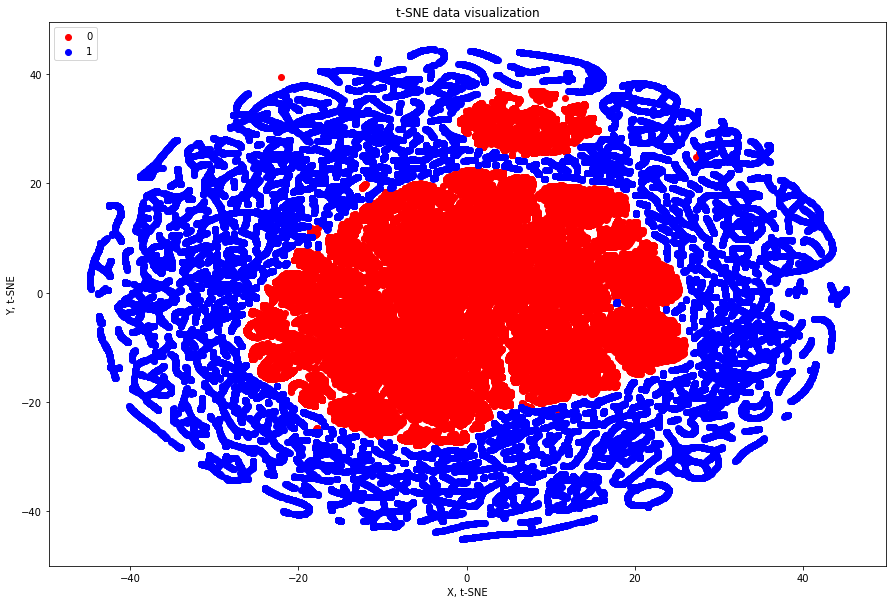

In [39]:
# takes N from each class and visualize with t-SNE
N_smote = 100000
visualizing_with_TSNE_sampled(N_smote, x_train_smote, y_train_smote)

We can see that, after re-sampling the data, the ratio of fraudulent transactions and genuine transactions is 1 to 1. Moreover, we can see that the synthetically generated data points are not randomly spread, but the two classes are visibly grouped and, except for few exceptions, separated. This is due to the method used to produce synthetic observations by over-sampling with SMOTE.

## CREATING THE GRAPH / DEFINING MODEL

*Network information:* 

> - **Layers:** 1 layer

> - **Units:** 7

> - **Activation:** ReLu

> - **Loss function:** Cross entropy

> - **Optimizer:** ADAM with a learning rate of 0.001 

> - **Number of epochs:** 10

> - **Batch size:** 10 000



In [17]:
# build the network
tf.reset_default_graph()

# number of nodes 
hidden_nodes = 7 

# defining 
num_features = x_train_smote.shape[1]
num_classes = 1

print("Feature shape\t\t", num_features)
print("Label shape\t\t", num_classes)


## define placeholders
x_pl = tf.placeholder(tf.float32, [None, num_features], name='xPlaceholder')
y_pl = tf.placeholder(tf.float32, [None], name='yPlaceholder')

# deine initializer
weight_initializer = tf.truncated_normal_initializer(stddev=0.15)

### create 1st layer
with tf.variable_scope('layer1'): 
    W_1 = tf.get_variable('W', [num_features, hidden_nodes],
                          initializer=weight_initializer)
    
    b_1 = tf.get_variable('b', [hidden_nodes],
                          initializer=tf.constant_initializer(0.0))
    
    with tf.variable_scope('output'):
        
        l_1 = tf.matmul(x_pl, W_1) + b_1
        l_1 = tf.nn.relu(l_1)       
        
        
### create 2th layer
with tf.variable_scope('layer2'):
    W2 = tf.get_variable('w2',[hidden_nodes,num_classes],
                     initializer= weight_initializer)
    
    b2 = tf.get_variable('b2',[num_classes],
                         initializer=tf.constant_initializer(0.0))
    
    with tf.variable_scope('output'):
        l_2 = tf.matmul(l_1, W2) + b2    
        
# output
y_out = tf.nn.sigmoid(l_2)
print('Model consits of ', utils_tf.num_params(), 'trainable parameters.')

Feature shape		 28
Label shape		 1
Model consits of  211 trainable parameters.


#### DEFINING OPERATIONS

In [18]:
### Implement training ops

LearningRateSmote = 0.001 

###################################
# 1) Define cross entropy loss
###################################

with tf.variable_scope('loss'):
    # computing cross entropy per sample
#     cross_entropy = -tf.reduce_sum(y_pl * tf.log(y_out))
    cross_entropy = -tf.reduce_sum(y_pl * tf.log(y_out), reduction_indices=[1])

    # Average over samples
    # Averaging makes the loss invariant to batch size, which is very nice.
    cross_entropy = tf.reduce_mean(cross_entropy)
    
###################################
# 2) Define the training op
###################################

with tf.variable_scope('trainOP'):
    # Defining our optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=LearningRateSmote)
    
    # Computing gradients
    grads_and_vars = optimizer.compute_gradients(cross_entropy)
    
    # Applying the gradients
    train_op = optimizer.apply_gradients(grads_and_vars)
    
    #train_op = optimizer.minimize(crossentropy)

###################################  
# 3) Define accuracy op
###################################

# with tf.variable_scope('performance'):
#     # making a one-hot encoded vector of correct (1) and incorrect (0) predictions
#     correct_prediction = tf.equal(tf.argmax(y_out, axis=1), tf.argmax(y_pl, axis=1))
    
#     # averaging the one-hot encoded vector   
#     accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# #mse = tf.reduce_mean(tf.squared_difference(y_out, y_pl))
# #opt = tf.train.AdamOptimizer().minimize(mse)

#### TRAINING

Starting...

---------------------------------------------------------------------------------------------------------
Epoch 1, Train cost: 2727.731,	 Val cost: 57.642, Val ROC curve (area = 0.871)	
Epoch 2, Train cost: 2220.257,	 Val cost: 55.468, Val ROC curve (area = 0.906)	
Epoch 3, Train cost: 1971.104,	 Val cost: 53.234, Val ROC curve (area = 0.917)	
Epoch 4, Train cost: 1782.211,	 Val cost: 50.931, Val ROC curve (area = 0.924)	
Epoch 5, Train cost: 1630.778,	 Val cost: 48.581, Val ROC curve (area = 0.928)	
Epoch 6, Train cost: 1511.940,	 Val cost: 46.208, Val ROC curve (area = 0.931)	
Epoch 7, Train cost: 1410.330,	 Val cost: 43.841, Val ROC curve (area = 0.933)	
Epoch 8, Train cost: 1309.037,	 Val cost: 41.504, Val ROC curve (area = 0.935)	
Epoch 9, Train cost: 1210.766,	 Val cost: 39.212, Val ROC curve (area = 0.936)	
Epoch 10, Train cost: 1133.082,	 Val cost: 36.967, Val ROC curve (area = 0.937)	
--------------------------------------------------------------------------------

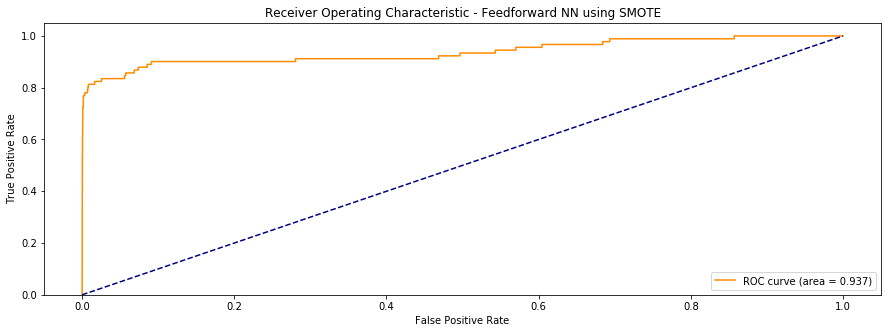

None
Done


In [92]:
# network params 
batch_size = 10000
max_epochs = 10 
display_step = 1
num_epochs = 0
epoch = 0

# batch sampling
np.random.seed(0)
train_indices = np.arange(len(x_train_smote))

# lists 
train_cost, val_cost, pred_smote = [],[],[]
y_out_train, train_batch_x, y_batch_idx, y_out_training = [],[],[],[]

# restricting memory usage, TensorFlow is greedy and will use all memory otherwise
gpu_opts = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)

with tf.Session(config=tf.ConfigProto(gpu_options=gpu_opts)) as sess:    
    try:
        sess.run(tf.global_variables_initializer())
        print("Starting...\n")
        print(str("---------------")*7)
        
        # total batches
        total_batch = int(x_train_smote.shape[0]/batch_size)
        for epoch in range(max_epochs):
            
            # shuffling
            np.random.shuffle(train_indices)
            
            # loop over all batches            
            for i in range(total_batch):

                batch_idx = train_indices[batch_size*i:batch_size*(i+1)]
                batch_xs = x_train_smote[batch_idx]
                batch_ys = y_train_smote[batch_idx]

                ######################################################################
                # 1) Run the train op
                ######################################################################
               
                feed_dict_train = {x_pl: batch_xs, y_pl: batch_ys}
                fetches_train = [train_op, cross_entropy, y_out]

                # running the train_op
                res = sess.run(fetches=fetches_train, feed_dict=feed_dict_train)
                
                # storing cross entropy, predictions (second fetch argument, so index=1)
                train_cost += [res[1]]   
                y_out_train = list(res[2])
                
                # storing for evaluation 
                y_batch_idx += list(batch_ys)
                y_out_training += list(y_out_train)
                
            # compute validation loss and accuracy
            if epoch % display_step == 0:
                num_epochs += 1
                
                ######################################################################
                # 2) Compute train_cost, val auc, train_acc, val auc
                ######################################################################
                
                ### VALIDATING ###
                # deciding which parts to fetch
                fetches_test = [cross_entropy, y_out]

                # what to feed our accuracy op
                feed_dict_valid = {x_pl: x_test_smote, y_pl: y_test_smote}
                            
                # running the validation
                res_t = sess.run(fetches_test, feed_dict=feed_dict_valid)

                # storing for evaluation 
                val_cost += [res_t[0]]
                pred_smote = list(res_t[1]) # y_out validation
                
                ######################################################################
                # 3) Print training summaries and plot
                ######################################################################

                print("Epoch %i, Train cost: %0.3f,\t Val cost: %0.3f, Val ROC curve (area = %0.3f)\t" % \
                      ((epoch+1), train_cost[-1],val_cost[-1], roc_auc_score(y_test_smote, pred_smote)))
              
        print(str("---------------")*7, "\n\n","Optimization Finished!")
        print("\n","Total epochs: %i\t Final validation ROC_AUC: %0.3f\t"% \
              ((epoch+1),roc_auc_score(y_test_smote, pred_smote)),"\n")
        print(get_plot_ROC(y_test_smote, pred_smote, 'Feedforward NN using SMOTE'))

        
    except KeyboardInterrupt:
        print('KeyboardInterrupt')

print('Done')

### RESULTS AND DISCUSSION
> The feedforward neural network with synthetic minority over-sampling performs better than the simple logistic regression. 

> Compared to our baseline, the AUC of 0.937 is 0.13 higher than the baseline of 0.808. This is due to the introduction of synthetic examples. This approach effectively forces the decision region of the minority class to become more general. The hypothesis shows to be true, rebalancing the dataset by creating synthetic observations from the minority class made learning more effective and increase the generalization on the test data.

# 2. FEEDFORWARD NEURAL NETWORK 
> ## WITH UNDERSAMPLING

### HYPOTHESIS 
> The strategy is to apply under-sampling to fight the class imbalance. 



>>-  A feedforward neural network with under-sampling will perform better than simple logistic regression on this problem.  


>>- Rebalancing the dataset by down sampling the majority class will level out the imbalance and thereby providing the network pure and equal class distribution making learning more effective and increase the feasibility of generalizing well on the test data.

**CONSIDERATIONS:**

>- Will the down-sampling provide too few examples to learn a effective generalization? Hence, not be able to make a good discrimination between the fraud and non-fraud class when the networks' ability to generalize is tested on the test data?

#### RandomUnderSampler
Undersampling seeks to reduce the number of majority class instances in the training set [23].
The result of this operation is a significant reduction of the number of records in the training set. A consequence and advantage of this method is also that the training time is greatly reduced. Moreover, there is a significant savings in memory.
A possible disadvantage of this approach is that, since we are eliminating members of the majority class, it is possible that valuable information will be lost in the process, because the technique could accidentally delete data points that are useful to build an accurate model. Particularly, important information about the decision boundary between the two classes could be lost  [20].

In random undersampling, the majority class instances in the training set are randomly deleted, until reaching a desired ratio between the minority and majority class.
Despite the simplicity, this technique has empirically been shown to be one of the most effective resampling methods [20].


**The model**

The next method that has been implemented applies under-sampling techniques to our original data. In other words, now we revert the operation done in the previous example: instead of introducing synthetic examples to have the same number of frauds and normal transactions, we remove normal transactions until this class has the same size of the minority class (the fraudulent transactions).

Formally, the majority class is under-sampled by removing samples from the majority class population until the minority class and the majority class have the same number of instances. The result will be an even class distribution [10].

One concern regarding this method is that, since the number of instances in the majority class are drastically decreased, we might lose some valuable information about normal transactions.


#### DATA PREPROCESSING & LOADING DATA

In [26]:
dataset_undrsamp = pd.read_csv('../data/creditcard.csv')
x_train_undrsamp, y_train_undrsamp, x_test_undrsamp, y_test_undrsamp = get_data(TEST_SIZE, RANDOM_SEED)

# describe data
print("Total examples: %i, total frau*d cases: %i." % (
    dataset_undrsamp.shape[0], (np.sum(y_train_undrsamp)+sum(y_test_undrsamp))),"\n")
print('Percentage of fraud counts in original dataset: %0.3f' % (
    (len(dataset_undrsamp[dataset_undrsamp.Class==1])*100)/(len(dataset_undrsamp[dataset_undrsamp.Class==0])+
                                              len(dataset_undrsamp[dataset_undrsamp.Class==1]))))
print("Total train examples: %i, total fraud cases: %i, equal to %0.5f of total cases. " % (
    x_train_undrsamp.shape[0], np.sum(y_train_undrsamp), np.sum(y_train_undrsamp)/x_train_undrsamp.shape[0]))

print("Total test examples: %i, total fraud cases: %i, equal to %0.5f of total cases. " % (
    x_test_undrsamp.shape[0], np.sum(y_test_undrsamp), np.sum(y_test_undrsamp)/y_test_undrsamp.shape[0]))

Total examples: 284807, total frau*d cases: 492. 

Percentage of fraud counts in original dataset: 0.173
Total train examples: 227845, total fraud cases: 401, equal to 0.00176 of total cases. 
Total test examples: 56962, total fraud cases: 91, equal to 0.00160 of total cases. 


In [27]:
from imblearn.under_sampling import RandomUnderSampler # sampling
RUS = RandomUnderSampler(random_state=RANDOM_SEED)
X_sampled_undrsamp, y_sampled_undrsamp = RUS.fit_sample(x_train_undrsamp,y_train_undrsamp.ravel())

# overwriting / input for network
x_train_undrsamp = X_sampled_undrsamp
y_train_undrsamp = y_sampled_undrsamp

# describe the data 
print("After sampling:\n")
print("Total examples: %i total fraud cases: %i." % (
    (x_train_undrsamp.shape[0]+x_test_undrsamp.shape[0]), (np.sum(y_train_undrsamp)+sum(y_test_undrsamp))),"\n")
print("Total train examples: %i, total fraud cases: %i, equal to %0.5f of total cases. " % (
    x_train_undrsamp.shape[0], np.sum(y_train_undrsamp), np.sum(y_train_undrsamp)/x_train_undrsamp.shape[0]))
print("Total test examples: %i, total fraud cases: %i, equal to %0.5f of total cases. " % (
    x_test_undrsamp.shape[0], np.sum(y_test_undrsamp), np.sum(y_test_undrsamp)/y_test_undrsamp.shape[0]),"\n")
print('Percentage of fraud counts in the new data: %i' % (
    (len(y_sampled_undrsamp[y_sampled_undrsamp==1])*100)/(len(y_sampled_undrsamp[y_sampled_undrsamp==0])+
                                                          len(y_sampled_undrsamp[y_sampled_undrsamp==1]))))

After sampling:

Total examples: 57764 total fraud cases: 492. 

Total train examples: 802, total fraud cases: 401, equal to 0.50000 of total cases. 
Total test examples: 56962, total fraud cases: 91, equal to 0.00160 of total cases.  

Percentage of fraud counts in the new data: 50



**Let's talk about the numbers**

The number of transactions in the training set **before applying under-sampling** is:
- 227444 normal transactions
- 401 fraud cases

The number of transactions in the training set **after applying under-sampling** is:
- 401 normal transactions
- 401 fraud cases

> We can see that the ratio of normal and fraudulent transactions is visibly different. In fact, now the training set is equally divided in normal cases (50%) and fraud cases (50%).

Let's investigate if this re-sampling makes a difference.


#### PLOTTING TRAINING DATA AFTER UNDERSAMPLING

/home/rkr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


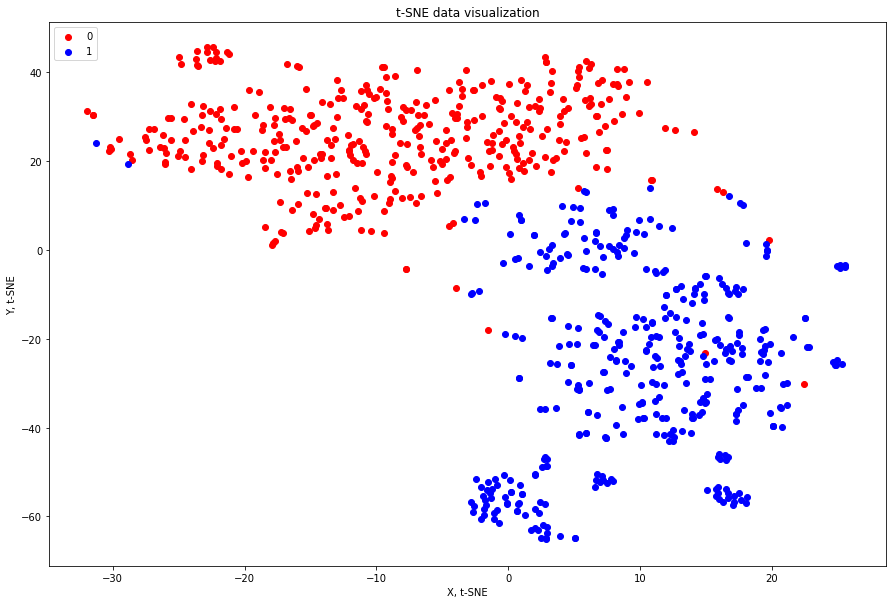

In [30]:
dataframe_undr = pd.DataFrame(x_train_undrsamp)
dataframe_undr['Class'] = y_train_undrsamp
visualizing_with_TSNE(401, dataframe_undr)

From the plot above, we can see that the majority class has been under-sampled, meaning that data points have been removed until the number of instances in the majority class was the same of the number of instances in the minority class. 

We will now train the network an investigate if this method entailed a loss of precious information in the majority class, or if this under-sampling method managed to spare important features the network will learn from. 

/home/rkr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


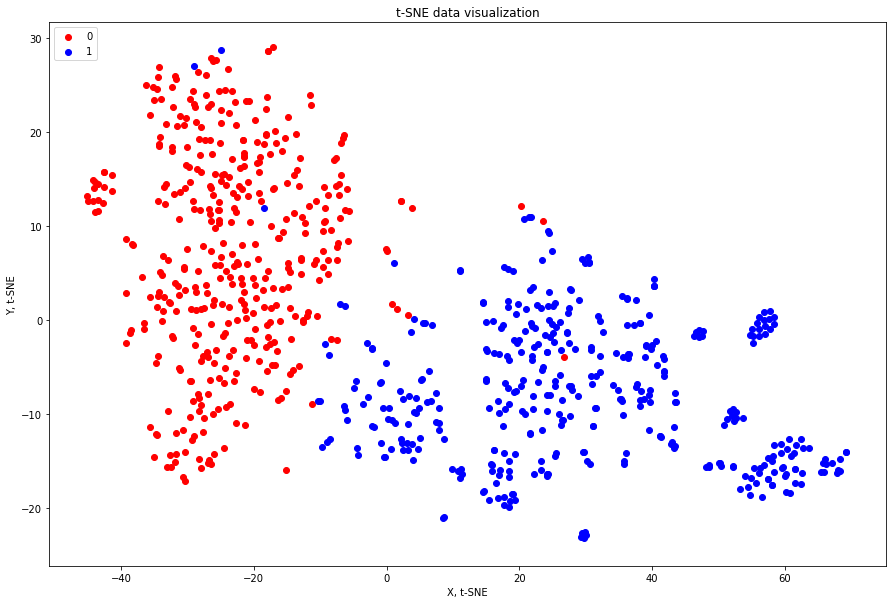

In [33]:
# takes N from each class and visualize with t-SNE
N_undr = 401
visualizing_with_TSNE_sampled(N_undr, x_train_undrsamp, y_train_undrsamp)

## CREATING THE GRAPH / DEFINING MODEL

*Network information:* 

> - **Layers:** 1 layer

> - **Units:** 3

> - **Activation:** ReLu

> - **Loss function:** Cross entropy

> - **Optimizer:** ADAM with a learning rate of 0.0005

> - **Number of epochs:** 30

> - **Batch size:** 48

In [84]:
# build the network
tf.reset_default_graph()

# number of nodes 
hidden_nodes = 3 

# defining 
num_features = x_train_undrsamp.shape[1]
num_classes = 1

print("Feature shape\t\t", num_features)
print("Label shape\t\t", num_classes)

## define placeholders
x_pl = tf.placeholder(tf.float32, [None, num_features], name='xPlaceholder')
y_pl = tf.placeholder(tf.float32, [None], name='yPlaceholder')

# deine initializer
weight_initializer = tf.truncated_normal_initializer(stddev=0.15)

### create 1st layer
with tf.variable_scope('layer1'): 
    W_1 = tf.get_variable('W', [num_features, hidden_nodes],
                          initializer=weight_initializer)
    
    b_1 = tf.get_variable('b', [hidden_nodes],
                          initializer=tf.constant_initializer(0.0))
    
    with tf.variable_scope('output'):
        
        l_1 = tf.matmul(x_pl, W_1) + b_1
        l_1 = tf.nn.relu(l_1)       
        
### create 2th layer
with tf.variable_scope('layer2'):
    W2 = tf.get_variable('w2',[hidden_nodes,num_classes],
                     initializer= weight_initializer)
    
    b2 = tf.get_variable('b2',[num_classes],
                         initializer=tf.constant_initializer(0.0))
    
    with tf.variable_scope('output'):
        l_2 = tf.matmul(l_1, W2) + b2

# output
y_out = tf.nn.sigmoid(l_2)
print('Model consits of ', utils_tf.num_params(), 'trainable parameters.')

Feature shape		 28
Label shape		 1
Model consits of  91 trainable parameters.


#### DEFINING OPERATIONS

In [85]:
### Implement training ops

LearningRateUndr = 0.0005

###################################
# 1) Define cross entropy loss
###################################

with tf.variable_scope('loss'):
    # computing cross entropy per sample
#     cross_entropy = -tf.reduce_sum(y_pl * tf.log(y_out))
    cross_entropy = -tf.reduce_sum(y_pl * tf.log(y_out), reduction_indices=[1])

    # Average over samples
    # Averaging makes the loss invariant to batch size, which is very nice.
    cross_entropy = tf.reduce_mean(cross_entropy)
    
###################################
# 2) Define the training op
###################################

with tf.variable_scope('trainOP'):
    # Defining our optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=LearningRateUndr)
    
    # Computing our gradients
    grads_and_vars = optimizer.compute_gradients(cross_entropy)
    
    # Applying the gradients
    train_op = optimizer.apply_gradients(grads_and_vars)
    
    #train_op = optimizer.minimize(crossentropy)

###################################  
# 3) Define accuracy op
###################################

# with tf.variable_scope('performance'):
#     # making a one-hot encoded vector of correct (1) and incorrect (0) predictions
#     correct_prediction = tf.equal(tf.argmax(y_out, axis=1), tf.argmax(y_pl, axis=1))
    
#     # averaging the one-hot encoded vector   
#     accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# #mse = tf.reduce_mean(tf.squared_difference(y_out, y_pl))
# #opt = tf.train.AdamOptimizer().minimize(mse)

#### TRAINING

Starting...

---------------------------------------------------------------------------------------------------------
Epoch 1, Train cost: 12.560,	 Val cost: 58.755, Val ROC curve (area = 0.596)	
Epoch 2, Train cost: 12.658,	 Val cost: 58.055, Val ROC curve (area = 0.679)	
Epoch 3, Train cost: 11.764,	 Val cost: 57.339, Val ROC curve (area = 0.738)	
Epoch 4, Train cost: 11.809,	 Val cost: 56.633, Val ROC curve (area = 0.794)	
Epoch 5, Train cost: 13.737,	 Val cost: 55.920, Val ROC curve (area = 0.836)	
Epoch 6, Train cost: 12.985,	 Val cost: 55.220, Val ROC curve (area = 0.863)	
Epoch 7, Train cost: 11.194,	 Val cost: 54.503, Val ROC curve (area = 0.883)	
Epoch 8, Train cost: 12.135,	 Val cost: 53.785, Val ROC curve (area = 0.892)	
Epoch 9, Train cost: 10.012,	 Val cost: 53.061, Val ROC curve (area = 0.898)	
Epoch 10, Train cost: 10.544,	 Val cost: 52.304, Val ROC curve (area = 0.904)	
Epoch 11, Train cost: 9.558,	 Val cost: 51.527, Val ROC curve (area = 0.910)	
Epoch 12, Train cost: 

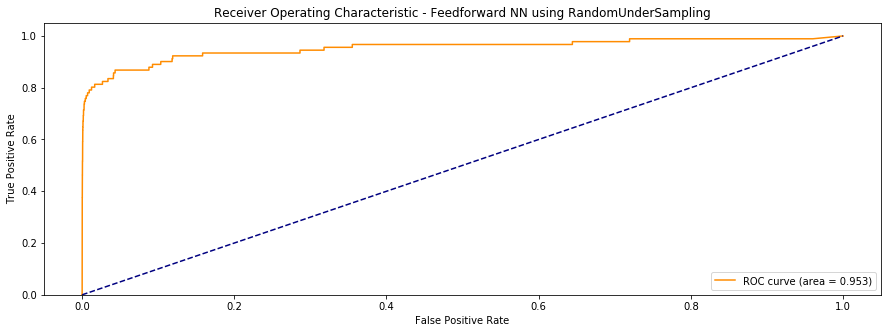

None
Done


In [91]:
# network params 
batch_size = 48 
max_epochs = 30 
display_step = 1
num_epochs = 0
epoch = 0

# batch sampling
np.random.seed(0)
train_indices = np.arange(len(x_train_undrsamp))

# lists 
train_cost, val_cost, pred_undrsamp = [],[],[]
y_out_train, train_batch_x, y_batch_idx, y_out_training = [],[],[],[]

# restricting memory usage, TensorFlow is greedy and will use all memory otherwise
gpu_opts = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)

with tf.Session(config=tf.ConfigProto(gpu_options=gpu_opts)) as sess:    
    try:
        sess.run(tf.global_variables_initializer())
        print("Starting...\n")
        print(str("---------------")*7)
        
        # total batches
        total_batch = int(x_train_undrsamp.shape[0]/batch_size)
        for epoch in range(max_epochs):
            
            # shuffling
            np.random.shuffle(train_indices)
            
            # loop over all batches            
            for i in range(total_batch):

                batch_idx = train_indices[batch_size*i:batch_size*(i+1)]
                batch_xs = x_train_undrsamp[batch_idx]
                batch_ys = y_train_undrsamp[batch_idx]

                ######################################################################
                # 1) Run the train op
                ######################################################################
               
                feed_dict_train = {x_pl: batch_xs, y_pl: batch_ys}
                fetches_train = [train_op, cross_entropy, y_out]

                # running the train_op
                res = sess.run(fetches=fetches_train, feed_dict=feed_dict_train)
                
                # storing cross entropy, predictions (second fetch argument, so index=1)
                train_cost += [res[1]]   
                y_out_train = list(res[2])
                
                # storing for evaluation 
                y_batch_idx += list(batch_ys)
                y_out_training += list(y_out_train)
                
            # compute validation loss and accuracy
            if epoch % display_step == 0:
                num_epochs += 1
                
                ######################################################################
                # 2) Compute train_cost, val auc, train_acc, val auc
                ######################################################################
                
                ### VALIDATING ###
                # deciding which parts to fetch
                fetches_test = [cross_entropy, y_out]

                # what to feed our accuracy op
                feed_dict_valid = {x_pl: x_test_undrsamp, y_pl: y_test_undrsamp}
                            
                # running the validation
                res_t = sess.run(fetches_test, feed_dict=feed_dict_valid)

                # storing for evaluation 
                val_cost += [res_t[0]]
                pred_undrsamp = list(res_t[1]) # y_out validation
                
                 ######################################################################
                # 3) Print training summaries and plot
                ######################################################################

                print("Epoch %i, Train cost: %0.3f,\t Val cost: %0.3f, Val ROC curve (area = %0.3f)\t" % \
                      ((epoch+1), train_cost[-1],val_cost[-1], roc_auc_score(y_test_undrsamp, pred_undrsamp)))
              
        print(str("---------------")*7, "\n\n","Optimization Finished!")
        print("\n","Total epochs: %i\t Final validation ROC_AUC: %0.3f\t"% \
              ((epoch+1),roc_auc_score(y_test_undrsamp, pred_undrsamp)),"\n")
        print(get_plot_ROC(y_test_undrsamp, pred_undrsamp, 'Feedforward NN using RandomUnderSampling'))

        
    except KeyboardInterrupt:
        print('KeyboardInterrupt')

print('Done')

### RESULTS AND DISCUSSION

The best model reviewed until this point is under-sampling


> Note: the accuracy on the training set is significantly lower than the accuracy of the validation set: this is because, in order to apply sampling techniques, we manipulate the training set, bringing the two classes to the same number of instances. The test set, on the other hand, has not been modified, meaning that the fraudulent cases in this set is 0.016%. Moreover, the training set is very small, only constituted by 808 instances.


Under-sampling the majority class also seems to be a good way to enhance the potential of our data. The next step is going to be combining under-sampling and over-sampling. In fact, by applying a combination of under-sampling and over-sampling, the initial bias of the learner towards the majority class is reversed in favor of the minority class. The network learns on the dataset perturbed by "SMOTING" the minority class and under-sampling the majority class [10].



# 3. FEEDFORWARD NEURAL NETWORK 
> ### - SYNTHETIC MINORITY OVER-SAMPLING (SMOTE) AND EDITED NEAREST NEIGHBOURS (ENN)


### HYPOTHESIS #### 


> The strategy is to apply synthetic minority over-sampling and edited nearest neighbours to fight the class imbalance. Since the literature proves that over-sampling with SMOTE introduces many noises examples, we expect that cleaning the data using Edited Nearest Neighbours will result in an increase of the performance of our network.

**CONSIDERATIONS:**
> In the previous case we were skeptic whether rebalancing the dataset from 401 to 227444 fraud cases would introduce noise to the learning or still be able to keep a accurate over-sampling of the minority class. Since the random under-sampling performed better than the over-sampling with SMOTE, we decided to investigate this a little further by using a modification of the previous case.  


As we can saw from the results previously discussed, oversampling with SMOTE seems like a very good way to handle the problem of imbalanced data. On the other hand, this method tends to generate noisy samples (e.g. when the different classes cannot be well separated) by interpolating new points between marginal outliers and inliers. This issue can be solved by applying an under-sampling algorithm to clean the noisy samples. 

In the literature, Tomek link and Edited Nearest-Neighbours are the two cleaning methods which have been used to obtain a cleaner space. They are both available in imbalance-learn. In the documentation of the imbalance-learn library it is stated that in general [SMOTEENN](http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.combine.SMOTEENN.html#imblearn.combine.SMOTEENN) cleans more noisy data than [SMOTETomek](http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.combine.SMOTETomek.html) [24-25].

Tomek links can be defined as two data points which belong to different classes and are each other’s nearest neighbors [11]. Undersampling can be obtained by removing all Tomek links from the dataset. Alternatively, it is also possible to only remove the majority class samples that are part of a Tomek link [26].

Undersampling of the majority class in ENN is done by removing points whose class label differs from a majority of its k-nearest neighbors [26].


Since SMOTEENN is expected to remove more “noisy examples” and provide a more clean decision surface it will be a good modification to test against SMOTE [27].

> - If SMOTEENN performs better than SMOTE it would indicate that the strong over-sampling may have introduced some noise. 





#### DATA PREPROCESSING & LOADING DATA

In [34]:
dataset_OUsamp = pd.read_csv('../data/creditcard.csv')
x_train_OUsamp, y_train_OUsamp, x_test_OUsamp, y_test_OUsamp = get_data(
                                                            TEST_SIZE, RANDOM_SEED)
# #Percentage of fraudlent records in original data
print("Total examples: %i, total fraud cases: %i." % (
    dataset_OUsamp.shape[0], (np.sum(y_train_OUsamp)+sum(y_test_OUsamp))),"\n")
print('Percentage of fraud counts in original dataset: %0.3f' % (
    (len(dataset_OUsamp[dataset_OUsamp.Class==1])*100)/(len(dataset_OUsamp[dataset_OUsamp.Class==0])+
                                              len(dataset_OUsamp[dataset_OUsamp.Class==1]))))

print("Total train examples: %i, total fraud cases: %i, equal to %0.5f of total cases. " % (
    x_train_OUsamp.shape[0], np.sum(y_train_OUsamp), np.sum(y_train_OUsamp)/x_train_OUsamp.shape[0]))

print("Total test examples: %i, total fraud cases: %i, equal to %0.5f of total cases. " % (
    x_test_OUsamp.shape[0], np.sum(y_test_OUsamp), np.sum(y_test_OUsamp)/y_test_OUsamp.shape[0]))

Total examples: 284807, total fraud cases: 492. 

Percentage of fraud counts in original dataset: 0.173
Total train examples: 227845, total fraud cases: 401, equal to 0.00176 of total cases. 
Total test examples: 56962, total fraud cases: 91, equal to 0.00160 of total cases. 


In [35]:
#Apply SMOTE w. ENN to create synthetic observations from minority class
#Source:https://github.com/scikit-learn-contrib/imbalanced-learn

from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
ENN = SMOTEENN(random_state=RANDOM_SEED, enn=EditedNearestNeighbours())
X_sampled_OUsamp,y_sampled_OUsamp = ENN.fit_sample(x_train_OUsamp,y_train_OUsamp.ravel())

# overwriting / input for network
x_train_OUsamp = X_sampled_OUsamp
y_train_OUsamp = y_sampled_OUsamp

# describe the data 
print("After sampling:\n")
print("Total examples: %i total fraud cases: %i." % (
    (x_train_OUsamp.shape[0]+x_test_OUsamp.shape[0]), (np.sum(y_train_OUsamp)+sum(y_test_OUsamp))),"\n")
print("Total train examples: %i, total fraud cases: %i, equal to %0.5f of total cases. " % (
    x_train_OUsamp.shape[0], np.sum(y_train_OUsamp), np.sum(y_train_OUsamp)/x_train_OUsamp.shape[0]))
print("Total test examples: %i, total fraud cases: %i, equal to %0.5f of total cases. " % (
    x_test_OUsamp.shape[0], np.sum(y_test_OUsamp), np.sum(y_test_OUsamp)/y_test_OUsamp.shape[0]),"\n")
print('Percentage of fraud counts in the new data: %i' % (
    (len(y_sampled_OUsamp[y_sampled_OUsamp==1])*100)/(len(y_sampled_OUsamp[y_sampled_OUsamp==0])+
                                                    len(y_sampled_OUsamp[y_sampled_OUsamp==1]))))

After sampling:

Total examples: 511850 total fraud cases: 227535. 

Total train examples: 454888, total fraud cases: 227444, equal to 0.50000 of total cases. 
Total test examples: 56962, total fraud cases: 91, equal to 0.00160 of total cases.  

Percentage of fraud counts in the new data: 50


/home/rkr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


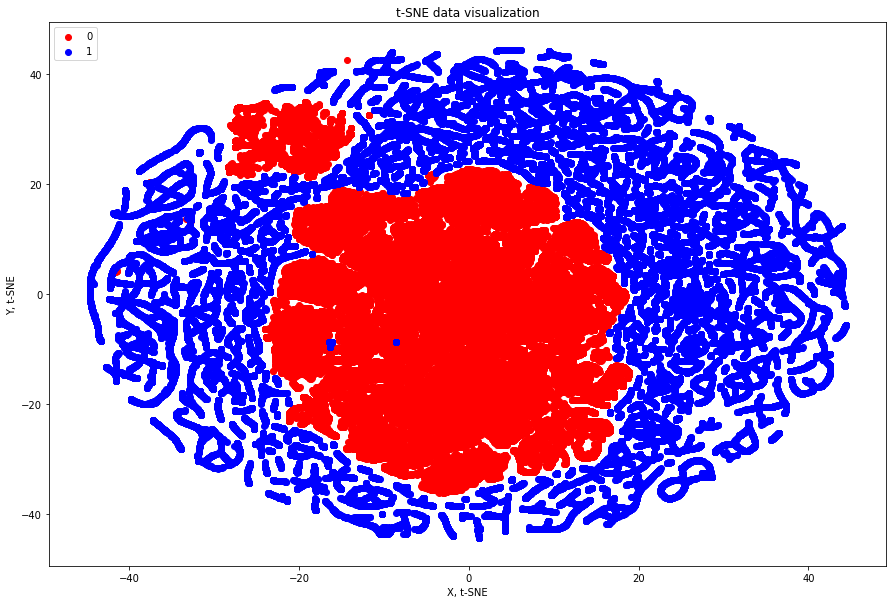

In [36]:
# visualizing N sampled data points 
N_comb = 100000
visualizing_with_TSNE_sampled(N_comb, x_train_OUsamp, y_train_OUsamp)

Comparing the two visualizations, we observe that the overlapping of data points is reduced, therefore the two classes are more efficiently separated from each other. The result is a noise reduction, which will, hopefully, result in a better performance of the feedforward network.

Let's investigate if there is an actual increase in the performance of the model.

## CREATING THE GRAPH / DEFINING MODEL

*Network information:* 

> - **Layers:** 1 layer

> - **Units:** 7

> - **Activation:** ReLu

> - **Loss function:** Cross entropy

> - **Optimizer:** ADAM with a learning rate of 0.0001

> - **Number of epochs:** 15

> - **Batch size:** 10 000

In [205]:
# build the network
tf.reset_default_graph()

# number of nodes 
hidden_nodes = 7

# define no. 
num_features = x_train_OUsamp.shape[1]
num_classes = 1

print("Feature shape\t\t", num_features)
print("Label shape\t\t", num_classes)


## define placeholders
x_pl = tf.placeholder(tf.float32, [None, num_features], name='xPlaceholder')
y_pl = tf.placeholder(tf.float32, [None], name='yPlaceholder')

# deine initializer
weight_initializer = tf.truncated_normal_initializer(stddev=0.15)

### create 1st layer
with tf.variable_scope('layer1'): 
    W_1 = tf.get_variable('W', [num_features, hidden_nodes],
                          initializer=weight_initializer)
    
    b_1 = tf.get_variable('b', [hidden_nodes],
                          initializer=tf.constant_initializer(0.0))
    
    with tf.variable_scope('output'):
        
        l_1 = tf.matmul(x_pl, W_1) + b_1
        l_1 = tf.nn.relu(l_1)       
        
        
### create 2th layer
with tf.variable_scope('layer2'):
    W2 = tf.get_variable('w2',[hidden_nodes,num_classes],
                     initializer= weight_initializer)
    
    b2 = tf.get_variable('b2',[num_classes],
                         initializer=tf.constant_initializer(0.0))
    
    with tf.variable_scope('output'):
        l_2 = tf.matmul(l_1, W2) + b2    
        
# output
y_out = tf.nn.sigmoid(l_2)

Feature shape		 28
Label shape		 1


#### DEFINING OPERATIONS

In [206]:
### Implement training ops

LearningRateOU = 0.0001

###################################
# 1) Define cross entropy loss
###################################

with tf.variable_scope('loss'):
    # computing cross entropy per sample
#     cross_entropy = -tf.reduce_sum(y_pl * tf.log(y_out))
    cross_entropy = -tf.reduce_sum(y_pl * tf.log(y_out), reduction_indices=[1])

    # Average over samples
    # Averaging makes the loss invariant to batch size, which is very nice.
    cross_entropy = tf.reduce_mean(cross_entropy)
    
###################################
# 2) Define the training op
###################################

with tf.variable_scope('trainOP'):
    # Defining our optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=LearningRateOU)
    
    # Computing gradients
    grads_and_vars = optimizer.compute_gradients(cross_entropy)
    
    # Applying the gradients
    train_op = optimizer.apply_gradients(grads_and_vars)
    
    #train_op = optimizer.minimize(crossentropy)

###################################  
# 3) Define accuracy op
###################################

# with tf.variable_scope('performance'):
#     # making a one-hot encoded vector of correct (1) and incorrect (0) predictions
#     correct_prediction = tf.equal(tf.argmax(y_out, axis=1), tf.argmax(y_pl, axis=1))
    
#     # averaging the one-hot encoded vector   
#     accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# #mse = tf.reduce_mean(tf.squared_difference(y_out, y_pl))
# #opt = tf.train.AdamOptimizer().minimize(mse)

#### TRAINING

Starting...

---------------------------------------------------------------------------------------------------------
Epoch 1, Train cost: 3520.851,	 Val cost: 60.759, Val ROC curve (area = 0.612)	
Epoch 2, Train cost: 3195.312,	 Val cost: 60.085, Val ROC curve (area = 0.709)	
Epoch 3, Train cost: 2979.471,	 Val cost: 59.426, Val ROC curve (area = 0.845)	
Epoch 4, Train cost: 2762.179,	 Val cost: 58.785, Val ROC curve (area = 0.903)	
Epoch 5, Train cost: 2555.299,	 Val cost: 58.164, Val ROC curve (area = 0.925)	
Epoch 6, Train cost: 2430.924,	 Val cost: 57.564, Val ROC curve (area = 0.935)	
Epoch 7, Train cost: 2348.871,	 Val cost: 56.982, Val ROC curve (area = 0.940)	
Epoch 8, Train cost: 2248.484,	 Val cost: 56.412, Val ROC curve (area = 0.943)	
Epoch 9, Train cost: 2132.940,	 Val cost: 55.850, Val ROC curve (area = 0.945)	
Epoch 10, Train cost: 2068.031,	 Val cost: 55.296, Val ROC curve (area = 0.947)	
Epoch 11, Train cost: 2026.615,	 Val cost: 54.747, Val ROC curve (area = 0.948)	

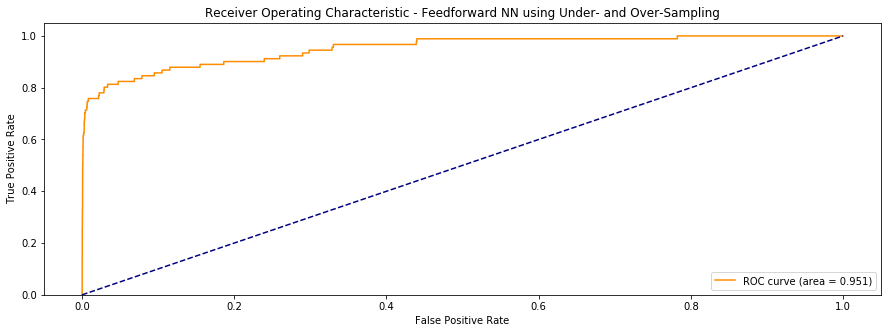

None
Done


In [207]:
# network params 
batch_size = 10000
max_epochs = 15 
display_step = 1
num_epochs = 0
epoch = 0

# batch sampling
np.random.seed(0)
train_indices = np.arange(len(x_train_OUsamp))

# lists 
train_cost, val_cost, pred_OUsamp = [],[],[]
y_out_train, train_batch_x, y_batch_idx, y_out_training = [],[],[],[]

# restricting memory usage, TensorFlow is greedy and will use all memory otherwise
gpu_opts = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)

with tf.Session(config=tf.ConfigProto(gpu_options=gpu_opts)) as sess:    
    try:
        sess.run(tf.global_variables_initializer())
        print("Starting...\n")
        print(str("---------------")*7)
        
        # total batches
        total_batch = int(x_train_OUsamp.shape[0]/batch_size)
        for epoch in range(max_epochs):
            
            # shuffle
            np.random.shuffle(train_indices)
            
            # loop over all batches            
            for i in range(total_batch):

                batch_idx = train_indices[batch_size*i:batch_size*(i+1)]
                batch_xs = x_train_OUsamp[batch_idx]
                batch_ys = y_train_OUsamp[batch_idx]

                ######################################################################
                # 1) Run the train op
                ######################################################################
               
                feed_dict_train = {x_pl: batch_xs, y_pl: batch_ys}
                fetches_train = [train_op, cross_entropy, y_out]

                # running the train_op
                res = sess.run(fetches=fetches_train, feed_dict=feed_dict_train)
                
                # storing cross entropy, predictions (second fetch argument, so index=1)
                train_cost += [res[1]]   
                y_out_train = list(res[2])
                
                # storing for evaluation 
                y_batch_idx += list(batch_ys)
                y_out_training += list(y_out_train)
                
            # compute validation loss and accuracy
            if epoch % display_step == 0:
                num_epochs += 1
                
                ######################################################################
                # 2) Compute train_cost, val auc, train_acc, val auc
                ######################################################################
                
                ### VALIDATING ###
                # deciding which parts to fetch
                fetches_test = [cross_entropy, y_out]

                # what to feed our accuracy op
                feed_dict_valid = {x_pl: x_test_OUsamp, y_pl: y_test_OUsamp}
                            
                # running the validation
                res_t = sess.run(fetches_test, feed_dict=feed_dict_valid)

                # storing for evaluation 
                val_cost += [res_t[0]]
                pred_OUsamp = list(res_t[1]) # y_out validation
                
                ######################################################################
                # 3) Print training summaries and plot
                ######################################################################

                print("Epoch %i, Train cost: %0.3f,\t Val cost: %0.3f, Val ROC curve (area = %0.3f)\t" % \
                      ((epoch+1), train_cost[-1],val_cost[-1], roc_auc_score(y_test_OUsamp, pred_OUsamp)))
              
        print(str("---------------")*7, "\n\n","Optimization Finished!")
        print("\n","Total epochs: %i\t Final validation ROC_AUC: %0.3f\t"% \
              ((epoch+1),roc_auc_score(y_test_OUsamp, pred_OUsamp)),"\n")
        print(get_plot_ROC(y_test_OUsamp, pred_OUsamp, 'Feedforward NN using Under- and Over-Sampling'))

        
    except KeyboardInterrupt:
        print('KeyboardInterrupt')

print('Done')

### RESULTS AND DISCUSSION

> With synthetic minority over-sampling with Edited Nearest Neighbours we managed to increase the performance. Compared to the baseline, the network outperformed logistic regression, with an AUC superior by 0.143. 


>Compared to the previous case with SMOTE, we managed to increase performance with an AUC of 0.014. 
Our hypothesis, that SMOTEENN is expected to, by removing “noisy examples”, provide a cleaner decision surface [27], increase the performance of our model, has been verified. 

>This also indicates that the strong over-sampling introduced some noise.

>By using SMOTEENN instead of SMOTE, we also found that we were able to increase the number of epochs from 10 to 15 and continue to successfully squeeze the training a little further. 

# 4. Deep FeedForward Neural Network 


According to the [DeepLearningBook by Goodfellow et al (p.195:197)](http://www.deeplearningbook.org/contents/mlp.html) [15]:

> *"In many circumstances, using deeper models can reduce the number of units required to represent the desired function and can reduce the amount of generalization error."* 

>*"Choosing a deep model encodes a very general belief that the function we want to learn should involve composition of several simpler functions. This can be interpreted from a representation learning point of view as saying that we believe the learning problem consists of discovering a set of underlying factors of variation that can in turn be described in terms of other, simpler underlying factors of variation."*



### HYPOTHESIS 

>We have already seen that the simpler network performs well on the classification task. The networks were helped by re-sampling techniques, where the input was manipulated. So, the questions is, will a deep network be able to capture more deep / abstract structures and patterns in the data, and hence, be able to make a fair discrimination between fraud and non-fraud, provided no re-sampling or feature engineering of the input?


### SUMMARY ABOUT THE DEEP NETWORK

> - **Data/ preprocessing:** We have not made use of any feature engineering or resampling techniques. As mentioned, we want to see how well the deep network perform by only providing it the raw imbalanced data.


> - **Architecture:** 4-layer Deep NN. Besides the input and output layer, we have 3 hidden layers: 1st hidden layer of 100 units, 2nd hidden layer of 70 units and 3rd hidden layer of 30 units.


> - **Regularization technique:** we have use dropout regularization in two layers.


> - **Activation:** Rectified linear unit (ReLU)


> - **Loss function:** Cross entropy


> - **Optimizer:** ADAM with a learning rate of 0.00005 


> - **Number of epochs:** 25


> - **Batch size:** 8000

#### DATA PREPROCESSING & LOADING DATA

In [187]:
dataset_dnn = pd.read_csv('../data/creditcard.csv')
x_train_dnn, y_train_dnn, x_test_dnn, y_test_dnn = get_data(TEST_SIZE, RANDOM_SEED)

# describe data
print("Total examples: %i, total fraud cases: %i." % (
    dataset_dnn.shape[0], (np.sum(y_train_dnn)+sum(y_test_dnn))),"\n")
print('Percentage of fraud counts in original dataset: %0.3f' % (
    (len(dataset_dnn[dataset_dnn.Class==1])*100)/(len(dataset_dnn[dataset_dnn.Class==0])+
                                              len(dataset_dnn[dataset_dnn.Class==1]))))
print("Total train examples: %i, total fraud cases: %i, equal to %0.5f of total cases. " % (
    x_train_dnn.shape[0], np.sum(y_train_dnn), np.sum(y_train_dnn)/x_train_dnn.shape[0]))

print("Total test examples: %i, total fraud cases: %i, equal to %0.5f of total cases. " % (
    x_test_dnn.shape[0], np.sum(y_test_dnn), np.sum(y_test_dnn)/y_test_dnn.shape[0]))


Total examples: 284807, total fraud cases: 492. 

Percentage of fraud counts in original dataset: 0.173
Total train examples: 227845, total fraud cases: 401, equal to 0.00176 of total cases. 
Total test examples: 56962, total fraud cases: 91, equal to 0.00160 of total cases. 


## CREATING THE GRAPH / DEFINING MODEL

In [196]:
# build the network
tf.reset_default_graph()

# defining 
num_features = x_train_dnn.shape[1]
num_classes = 1

print("Feature shape\t\t", num_features)
print("Label shape\t\t", num_classes)

# number of nodes in each layer
hidden_nodes1 = 100
hidden_nodes2 = 70
hidden_nodes3 = 30

## define placeholders
x_pl = tf.placeholder(tf.float32, [None, num_features], name='xPlaceholder')
y_pl = tf.placeholder(tf.float32, [None], name='yPlaceholder')

# dropout.
pkeep = tf.placeholder(tf.float32)

# define initializer
weight_initializer = tf.truncated_normal_initializer(stddev=0.15)

### create 1st layer
with tf.variable_scope('layer1'): 
    W_1 = tf.get_variable('W', [num_features, hidden_nodes1],
                          initializer=weight_initializer)
    
    b_1 = tf.get_variable('b', [hidden_nodes1],
                          initializer=tf.constant_initializer(0.0))
    
    with tf.variable_scope('output'):
        
        l_1 = tf.matmul(x_pl, W_1) + b_1
        l_1 = tf.nn.relu(l_1)       

### create 2nd layer
with tf.variable_scope('layer2'): 
    W_2 = tf.get_variable('W', [hidden_nodes1, hidden_nodes2],
                          initializer=weight_initializer)
    
    b_2 = tf.get_variable('b', [hidden_nodes2],
                          initializer=tf.constant_initializer(0.0))
    
    with tf.variable_scope('output'):
        
        l_2 = tf.matmul(l_1, W_2) + b_2
        l_2 = tf.nn.relu(l_2)
        
        
### create 3rd layer
with tf.variable_scope('layer3'):
    W3 = tf.get_variable('w3',[hidden_nodes2,hidden_nodes3],
                     initializer= weight_initializer)
    
    b3 = tf.get_variable('b3',[hidden_nodes3],
                         initializer=tf.constant_initializer(0.0))
    
    with tf.variable_scope('output'):
        l_3 = tf.matmul(l_2, W3) + b3  
        l_3 = tf.nn.relu(l_3) 
        l_3 = tf.nn.dropout(l_3, pkeep) # dropout

        
### create 4th layer
with tf.variable_scope('layer4'):
    W4 = tf.get_variable('w4',[hidden_nodes3,num_classes],
                     initializer= weight_initializer)
    
    b4 = tf.get_variable('b4',[num_classes],
                         initializer=tf.constant_initializer(0.0))
    
    with tf.variable_scope('output'):
        l_4 = tf.matmul(l_3, W4) + b4  

# output
# y_out = tf.nn.sigmoid_cross_entropy_with_logits(labels=l_4, logits=l_4)
y_out = tf.nn.sigmoid(l_4)
print('Model consits of ', utils_tf.num_params(), 'trainable parameters.')

Feature shape		 28
Label shape		 1
Model consits of  12131 trainable parameters.


#### DEFINING OPERATIONS

In [197]:
### Implement training ops
LearningRateDNN = 0.00005

###################################
# 1) Define cross entropy loss
###################################

with tf.variable_scope('loss'):
    # computing cross entropy per sample
#     cross_entropy = -tf.reduce_sum(y_pl * tf.log(y_out))
    cross_entropy = -tf.reduce_sum(y_pl * tf.log(y_out), reduction_indices=[1])

    # Average over samples
    # Averaging makes the loss invariant to batch size, which is very nice.
    cross_entropy = tf.reduce_mean(cross_entropy)
    
###################################
# 2) Define the training op
###################################

with tf.variable_scope('trainOP'):
    # Defining our optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=LearningRateDNN) 
    
    # Computing our gradients
    grads_and_vars = optimizer.compute_gradients(cross_entropy)
    
    # Applying the gradients
    train_op = optimizer.apply_gradients(grads_and_vars)
    
    #train_op = optimizer.minimize(crossentropy)

###################################  
# 3) Define accuracy op
###################################

with tf.variable_scope('performance'):
    # making a one-hot encoded vector of correct (1) and incorrect (0) predictions
    correct_prediction = tf.equal(tf.argmax(y_out, axis=1), tf.argmax(y_pl, axis=1))
    
    # averaging the one-hot encoded vector   
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#mse = tf.reduce_mean(tf.squared_difference(y_out, y_pl))
#opt = tf.train.AdamOptimizer().minimize(mse)

#### TRAINING

Starting...

---------------------------------------------------------------------------------------------------------
Epoch 1, Train cost: 6.581,	 Val cost: 49.790, Val ROC curve (area = 0.854)	
Epoch 2, Train cost: 6.472,	 Val cost: 45.020, Val ROC curve (area = 0.863)	
Epoch 3, Train cost: 8.058,	 Val cost: 40.459, Val ROC curve (area = 0.888)	
Epoch 4, Train cost: 5.566,	 Val cost: 35.944, Val ROC curve (area = 0.894)	
Epoch 5, Train cost: 5.270,	 Val cost: 31.648, Val ROC curve (area = 0.893)	
Epoch 6, Train cost: 5.194,	 Val cost: 27.578, Val ROC curve (area = 0.912)	
Epoch 7, Train cost: 2.639,	 Val cost: 23.715, Val ROC curve (area = 0.908)	
Epoch 8, Train cost: 2.935,	 Val cost: 20.250, Val ROC curve (area = 0.910)	
Epoch 9, Train cost: 2.452,	 Val cost: 17.150, Val ROC curve (area = 0.903)	
Epoch 10, Train cost: 2.385,	 Val cost: 14.379, Val ROC curve (area = 0.893)	
Epoch 11, Train cost: 1.183,	 Val cost: 11.948, Val ROC curve (area = 0.905)	
Epoch 12, Train cost: 0.983,	 Va

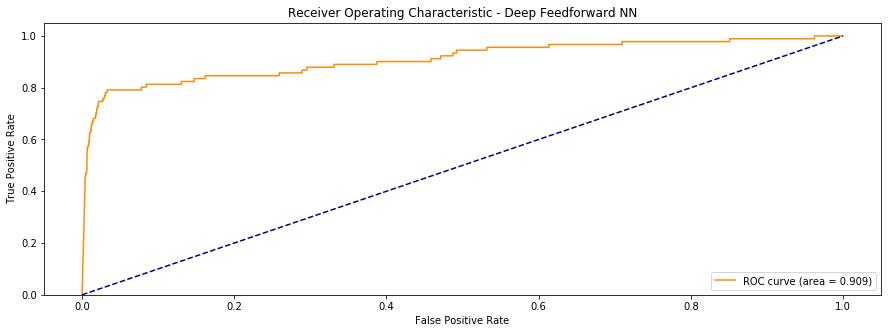

None
Complete


In [201]:
# network params 
batch_size = 8000 
max_epochs = 25
display_step = 1
num_epochs = 0
epoch = 0
training_dropout = 0.9

# batch sampling
np.random.seed(0)
train_indices = np.arange(len(x_train_dnn))

# lists 
train_cost, val_cost, pred_dnn = [],[],[]
y_out_train, train_batch_x, y_batch_idx, y_out_training = [],[],[],[]

# restricting memory usage, TensorFlow is greedy and will use all memory otherwise
gpu_opts = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)

with tf.Session(config=tf.ConfigProto(gpu_options=gpu_opts)) as sess:    
    try:
        sess.run(tf.global_variables_initializer())
        print("Starting...\n")
        print(str("---------------")*7)
        
        # total batches
        total_batch = int(x_train_dnn.shape[0]/batch_size)
        for epoch in range(max_epochs):
            
            # shuffling
            np.random.shuffle(train_indices)
            
            # loop over all batches            
            for i in range(total_batch):

                batch_idx = train_indices[batch_size*i:batch_size*(i+1)]
                batch_xs = x_train_dnn[batch_idx]
                batch_ys = y_train_dnn[batch_idx]

                ######################################################################
                # 1) Run the train op
                ######################################################################
               
                feed_dict_train = {x_pl: batch_xs, y_pl: batch_ys, pkeep: training_dropout}
                fetches_train = [train_op, cross_entropy, y_out]

                # running the train_op
                res = sess.run(fetches=fetches_train, feed_dict=feed_dict_train)
                
                # storing cross entropy, predictions (second fetch argument, so index=1)
                train_cost += [res[1]]   
                y_out_train = list(res[2])
                
                # storing for evaluation 
                y_batch_idx += list(batch_ys)
                y_out_training += list(y_out_train)
                
            # compute validation loss and accuracy
            if epoch % display_step == 0:
                num_epochs += 1
                
                ######################################################################
                # 2) Compute train_cost, val auc, train_acc, val auc
                ######################################################################
                
                ### VALIDATING ###
                # deciding which parts to fetch
                fetches_test = [cross_entropy, y_out]

                # what to feed our accuracy op
                feed_dict_valid = {x_pl: x_test_dnn, y_pl: y_test_dnn, pkeep: training_dropout}
                            
                # running the validation
                res_t = sess.run(fetches_test, feed_dict=feed_dict_valid)

                # storing for evaluation 
                val_cost += [res_t[0]]
                pred_dnn = list(res_t[1]) # y_out validation
                
                ######################################################################
                # 3) Print training summaries and plot
                ######################################################################

                print("Epoch %i, Train cost: %0.3f,\t Val cost: %0.3f, Val ROC curve (area = %0.3f)\t" % \
                      ((epoch+1), train_cost[-1],val_cost[-1], roc_auc_score(y_test_dnn, pred_dnn)))
              
        print(str("---------------")*7, "\n\n","Optimization Finished!")
        print("\n","Total epochs: %i\t Final validation ROC_AUC: %0.3f\t"% \
              ((epoch+1),roc_auc_score(y_test_dnn, pred_dnn)),"\n")
        print(get_plot_ROC(y_test_dnn, pred_dnn, 'Deep Feedforward NN'))

        
    except KeyboardInterrupt:
        print('KeyboardInterrupt')

print('Complete')

### RESULTS AND DISCUSSION
> The Deep Neural Network achieves great results, although they are not higher than the results achieved by using sampling techniques.
With the implementation of this model, we wanted to verify if a more complex model can learn some meaningful aspect of the data, and have a high performance, even when the dataset is highly imbalanced. 

>The model seems to have learned valuable features, but the performance of this model is not superior to a simple feedforward network with data sampling. 

> Another reflection we should make about this model is that is quite complicated to implement and it requires lots of effort in order to tune the parameters and, thus, achieve high performance. 
Since the aim of our study is to present a real-life problem and evaluate different methods that could be employed by companies, we do not believe that this approach is the most optimal: it might achieve pretty satisfying results, but the effort required to implement the network and tune the parameters is higher than the results obtained. Therefore, we believe that better models might be more valuable to be used in this circumstance.

# SEMI-SUPERVISED FRAUD DETECTION
> *“Techniques that operate in a semisupervised mode, assume that the training data has labeled instances for only the normal class.”* (Chandola, V., 2009)

This approach does not need labels for the anomaly class. Fraud scenarios can be difficult and challenging to model, which we mentioned earlier in the challenges of credit card fraud detection. The approach we will take is to build a model for the class corresponding to normal behaviour. We will use this model to identify anomalies in the test data. There exists very few anomaly detection techniques in this area  (Chandola, V., 2009). Luckily autoencoders can aid us support for this approach. 
 
 -----
 


# 5. AUTOENCODER FOR ANOMALY DETECTION

> *"By modeling your purchasing habits, a credit card company can detect misuse of your cards. If a thief steals your credit card or credit card information, the thief’s purchases will often come from a diﬀerent probability distribution over purchase types than your own. The credit card companycan prevent fraud by placing a hold on an account as soon as that card hasbeen used for an uncharacteristic purchase."*

> Deeplearningbook.org, see  [page 100 "Anomaly detection".](http://www.deeplearningbook.org/contents/ml.html) by Goodfellow et. al [15].





#### AUTOENCODER ARCHITECTURE 
>The Autoencoder is an neural network used for unsupervised learning and for learning generative models of data. An autoencoder  *encodes* an input $x$ into a latent state $z$ and decodes $z$ into a reconstruction $\hat{x}$. 


<img src="AE.png" alt="Drawing" style="width: 200px;"/>,


>The parameters of the network are optimized with respect to the difference between $x$ and $\hat{x}$. In our case, the difference can be measured with mean squared error (MSE).

$$
MSE = \frac{1}{n} \sum_{i=1}^n (\hat{X_i} - X_i)² 
$$
>*An error measure quantifies how well the reconstruction approximates to the target.
*

For our implementation of an undercomplete autoencoder, we will make use of deep encoders and deep decoders. The reason for creating a deep autoencoder is that deep autoencoders should yield a greater compression than shallow and simple autoencoders [(Goodfellow et al, 2016, chapter 14)](http://www.deeplearningbook.org/contents/autoencoders.html) [15] and  [ (Geoffrey Hinton and Ruslan Salakhutdinov, 2006)](https://www.cs.toronto.edu/~hinton/science.pdf) [28].
We experimented with various approaches from simple and single layer to deep. The deep autoencoder performed better than the other approaches. 


### ASSUMPTION AND APPROACH

First, we assume that the above mentioned quote is true for our case that fraudulent transactions tend to have different characteristics over non-fraudulent transaction. 

Looking for anomalies is like looking for a needle in a hay-stack without knowing how the needle looks. In some cases, you have annotated historical data where fraudulent transaction are labelled. When using labeled data, you try to discriminate based on what you know and thereby exclude yourself from catching "new types" of fraud. Fraud can assume many shapes and the characteristics are constantly changing in order to by-pass diverse detection system. So, discriminating based on "how it looked yesterday" will not catch "how it might look today".  

*So what kind of measures can we take in order not to always be a step behind the fraudsters by learning from historic data and previous examples?*

Another approach to detect anomalies is to define a "group of normal instances" were the normal non-fraudulent transactions lies and classify anything out of that "group" as an anomaly, given a certain measure. Here an autoencoder can help us to discriminate between the two classes.

Concretely, we will remove all fraud-cases from the training data such that the data only contains in normal transactions. We will then train the autoencoder to be really good at reconstruction these instances. 

**THE HYPOTHESIS**
> - What we expected is that the squared of the errors 
$$(\hat{X_i} - X_i)²$$  
will be low for the normal transaction and high for fraudulent transaction since the autoencoder is expected to have difficulties reconstructing unseen fraudulent transactions compared to more known non-fraudulent transactions. 

This approach introduces some **challenges** that Matheus Facure has described well in [Semi-Supervised Anomaly Detection Survey](https://www.kaggle.com/matheusfacure/semi-supervised-anomaly-detection-survey) [11], which we have to be aware of when using this approach:

----
- *Modeling a normal region that captures all normal behavior is extremely difficult and the boundary between normal an abnormal is often blurred.*

- *Anomalies might be the result of malicious actions.*

- *The normal behavior can change, and then a current notion of normal might not be valid in the future.*

- *If the data contains a lot of noise, it is difficult to distinguish noisy instances from anomalies.*


----


We rely on autoencoder for anomaly detection to discriminate normal transactions from fraudulent transactions. Therefore, our objective is to create and model an autoencoder to learn the common patterns and structures that are shared by the majority training data. 

During the training operation, we only provided the network with one-class non-fraudulent transactions. Those are the normal transactions we want to learn a good compressed internal representation of, and thus reach a low reconstruction error for those cases. 

An autoencoder objective is to learn to approximate the following identity function: 

## $$f_{w,b} (x) \approx x $$

Our hypothesis is, when the model is presented with a mix of fraudulent and non-fraudulent examples, it will be able to discriminate whether a transaction belongs to the fraudulent class or the non-fraudulent class based on the networks ability to reconstruct the examples.

During the test phase, or rather reconstruction, the reconstruction error is expected to be high for the data who do not conform to the patterns of the non-fraudulent transactions, learned from the training. Those with a high reconstruction error are the ‘anomalies’. These anomalies can either be outliers or the fraudulent transaction that we are seeking to discriminate. 

Based on the reconstruction of the test data, we will choose a threshold and classify examples with a reconstruction error above the threshold as being fraudulent. 

We will then look into the placement of the threshold.  This is a trade-off since if we lower the threshold we will increase the true negative rate, but, simultaneously, we will also increase the false negative rate. 
On the other hand, if we chose a higher threshold, we will decrease the false negative rate, but increase the false positive rate. Therefore, setting the threshold value is more of a ‘business decision’ depending on the preference or goal. 

#### CODE REFERENCE:
We were inspired by Weimin Wang [GitHub](https://github.com/aaxwaz/Fraud-detection-using-deep-learning) [29] and Aymeric Damien [GitHub.](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/autoencoder.py) [30] work on autoencoders. In the end, our code has turned out different from theirs, but we have made use and modified some code from those projects. 


#### DATA PREPROCESSING & LOADING DATA

In [132]:
# RANDOM_SEED and TEST_SIZE 
X_train_mix, X_test = train_test_split(sk_shuffle(pd.read_csv('../data/creditcard.csv')), 
                                        test_size=TEST_SIZE, random_state=RANDOM_SEED)

X_train = X_train_mix[X_train_mix.Class == 0]
X_train = X_train.drop(['Class'], axis=1) # drop 

print('Training data:','\n Total: ', len(X_train_mix), '\n Normal:', len(X_train),'\n Fraud: ',
      len(X_train_mix)-len(X_train),'\n Shape:', X_train.shape,'\n')
print('Test data:','\n Total: ',len(X_test),'\n Normal:',len(X_test[X_test.Class == 0]),
      '\n Fraud: ',len(X_test[X_test.Class == 1]))

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1) # drop 

# Input for network
train_x_autoenc = X_train.values
test_x_autoenc = X_test.values
test_y_autoenc = y_test
print(' Shape:',X_test.shape)


# feature normalization 2 - z score (for tanh activation)
#Code adapted from Weimin Wang's project
#Source: https://github.com/aaxwaz
cols_mean, cols_std = [], []
for c in range(train_x_autoenc.shape[1]):
    cols_mean.append(train_x_autoenc[:,c].mean())
    cols_std.append(train_x_autoenc[:,c].std())
    train_x_autoenc[:, c] = (train_x_autoenc[:, c] - cols_mean[-1]) / cols_std[-1]
    test_x_autoenc[:, c] =  (test_x_autoenc[:, c] - cols_mean[-1]) / cols_std[-1]

Training data: 
 Total:  227845 
 Normal: 227440 
 Fraud:  405 
 Shape: (227440, 30) 

Test data: 
 Total:  56962 
 Normal: 56875 
 Fraud:  87
 Shape: (56962, 30)


## CREATING THE GRAPH / DEFINING MODEL

*Network information:* 

> - **Layers:** 2 encoding layers, 2 decofing layers

> - **Units:** 2 x 18 units

> - **Activation:** Tanh

> - **Loss function:** Mean Squared Error (MSE)

> - **Optimizer:** RMSProp with a learning rate of 0.1 and a decay of 0.9

> - **Number of epochs:** 10

> - **Batch size:** 512

In [134]:
# network parameters
n_hidden_1 = 18 
n_hidden_2 = 18 
n_input = train_x_autoenc.shape[1] # data input (shape: 30)

# placeholder, X
X = tf.placeholder("float", [None, n_input], name='xPlaceholder')

# building the encoder
with tf.variable_scope('encoder'):
    def encoder(x):
        ''' encoder function'''
        # encoder layer #1 
        layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, tf.Variable(tf.random_normal([n_input, n_hidden_1]))),
                                       tf.Variable(tf.random_normal([n_hidden_1]))))
        # encoder layer #2 
        layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))),
                                       tf.Variable(tf.random_normal([n_hidden_2]))))             
        return layer_2


# building the decoder
with tf.variable_scope('decoder'):
    def decoder(x):
        ''' decoder function'''
        # decoder layer #1  
        layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1]))),
                                       tf.Variable(tf.random_normal([n_hidden_1]))))
        # decoder layer #2 
        layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, tf.Variable(tf.random_normal([n_hidden_1, n_input]))),
                                      tf.Variable(tf.random_normal([n_input]))))        
        return layer_2

    
# construct model
with tf.variable_scope('construct_model'):
    encoder_op = encoder(X)
    decoder_op = decoder(encoder_op)
    
# prediction
with tf.variable_scope('predction'):
    y_pred = decoder_op
    # targets are the input data.
    y_true = X

#print('Model consits of ', utils_tf.num_params(), 'trainable parameters.')

### LOSS FUNCTION
We wish to optimize the parameters of the model such that the reconstruction error is minimized. 
> **The Mean Squared Error [MSE]** also called squared difference measures the average of the squares of the errors. Hence, the difference between the estimator and the estimated. 

We calculate the mean $\frac{1}{n} \sum_{i=1}^n$ of the squared of the errors $(\hat{X_i} - X_i)² $:

$$
MSE = \frac{1}{n} \sum_{i=1}^n (\hat{X_i} - X_i)² 
$$


In [135]:
# define batch mse
with tf.variable_scope('batch_mse'):
    batch_mse = tf.reduce_mean(tf.pow(y_true - y_pred, 2), 1)
    
# define loss, minimize the squared error
with tf.variable_scope('cost'):
    cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))

### STOCHASTIC GRADIENT DESCENT 
> **RMSProp (for Root Mean Square Propagation)**
- Keep	a	moving	average	of	the	squared	gradient	for	each	weight: 

$$ MeanSquare(w,t) = \gamma  MeanSquare(w,t-1) + \eta ( \frac{∂E}{∂w(t)} )^2 $$

Hinton suggest the decay, $\gamma$, to be 0.9 and and the learning rate, $\eta$ set to 0.1 [31].

In [136]:
learning_rate = 0.1 # eta
decay = 0.9 # gamma

# define optimizer 
with tf.variable_scope('optimizer'):
    optimizer = tf.train.RMSPropOptimizer(learning_rate, decay).minimize(cost)

#### TRAINING

In [137]:
# parameters
training_epochs = 10 
batch_size = 512
display_step = 1

# set directory
data_dir = './models/'
save_model = os.path.join(data_dir, 'temp_saved_model_autoencoder.ckpt')
saver = tf.train.Saver()

In [138]:
# initializing variables
init = tf.global_variables_initializer()

cost_measure, training_mse, epoch_count = [], [], []
with tf.Session() as sess_auto:
    print("Start training...", "\n")
    print(str("---------------")*5)
    now = datetime.now()
    sess_auto.run(init)
    total_batch = int(train_x_autoenc.shape[0]/batch_size)
    
    # training operations
    for epoch in range(training_epochs):
        
        # looping over batches
        for i in range(total_batch):
            batch_idx = np.random.choice(train_x_autoenc.shape[0], batch_size, replace=True)
#             batch_idx = sk_shuffle(train_x_autoenc.shape[0], batch_size)
            batch_xs = train_x_autoenc[batch_idx]
            
            # compute optimization (backprop) and compute cost optimization (to get loss value)
            _, c = sess_auto.run([optimizer, cost], feed_dict={X: batch_xs})
            
        # display logs per epoch step
        if epoch % display_step == 0:
            train_batch_mse = sess_auto.run(batch_mse, feed_dict={X: train_x_autoenc})
            # store and print training statistics
            cost_measure.append(c)
            training_mse.append(train_batch_mse)
            epoch_count.append(epoch)
            print("Epoch: %i," % (epoch+1),
                  "\t","Reconstruction error/ cost:", "{:.3f}".format(c))

    print(str("---------------")*5, "\n","Optimization Finished!","\n")
    
    # plotting
    #plt.figure(figsize=(10,4))
    #plt.plot(epoch_count, cost_measure)
    #plt.title('Training'); plt.xlabel('epoch'); plt.ylabel('cost'); plt.xlim((0, len(epoch_count)))
    #plt.legend(loc=4); plt.grid(); plt.tight_layout(); plt.show()
    
    # save session
    save_path = saver.save(sess_auto, save_model)
    print("\n", "Model saved in file: %s" % save_path)
print("\n","Training complete!.")

Start training... 

---------------------------------------------------------------------------
Epoch: 1, 	 Reconstruction error/ cost: 0.769
Epoch: 2, 	 Reconstruction error/ cost: 0.486
Epoch: 3, 	 Reconstruction error/ cost: 0.557
Epoch: 4, 	 Reconstruction error/ cost: 0.442
Epoch: 5, 	 Reconstruction error/ cost: 0.629
Epoch: 6, 	 Reconstruction error/ cost: 0.459
Epoch: 7, 	 Reconstruction error/ cost: 0.769
Epoch: 8, 	 Reconstruction error/ cost: 0.532
Epoch: 9, 	 Reconstruction error/ cost: 0.578
Epoch: 10, 	 Reconstruction error/ cost: 0.618
--------------------------------------------------------------------------- 
 Optimization Finished! 


 Model saved in file: ./models/temp_saved_model_autoencoder.ckpt

 Training complete!.


In [139]:
# loading the model
save_model = os.path.join(data_dir, 'temp_saved_model_autoencoder.ckpt')
saver = tf.train.Saver()

# initializing variables
init = tf.global_variables_initializer()

with tf.Session() as sess_auto:
    now = datetime.now()
    # restore model
    saver.restore(sess_auto, save_model)
    # applying model
    test_batch_mse = sess_auto.run(batch_mse, feed_dict={X: test_x_autoenc})
    print("Test auc score: {:.6f}".format(metrics.roc_auc_score(test_y_autoenc, test_batch_mse)))

INFO:tensorflow:Restoring parameters from ./models/temp_saved_model_autoencoder.ckpt
Test auc score: 0.968330


### RESULTS AND DISCUSSION

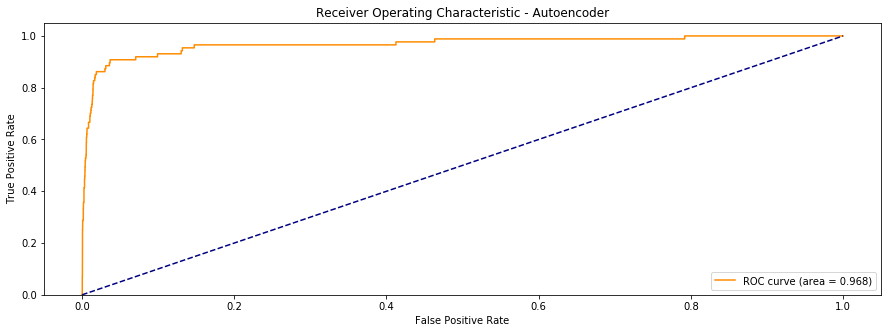

In [140]:
get_plot_ROC(test_y_autoenc, test_batch_mse, 'Autoencoder')

As hypothesized, the Autoencoder manages to achieve the highest AUC score. The ROC curve shows that the False Positive Rate is approximately 0 until 0.83. Since our goal is to minimize the FPR and maximize the TPR, that threshold seems like the obvious choice to make. 

But let's discuss the difference that the optimal threshold decision can make with an example.

# APPLICATION OF THE AUTOENCODER (example) 



## SETTING THRESHOLDS 
#### How to find the optimal threshold

Since the aim of our study is to analyze a real-life problem, we will deepen our analysis of the subject with a practical example.

Credit card fraud is an issue that many companies have to face, and therefore in the last years the interest in this area has grown exponentially. Big companies with many human resources can afford to employ many human labour in order to detect as many frauds cases as possible. But what about small companies? 

When we have a large amount of data, which grows every day, it is not possible to afford to pay human resources to review each case, therefore we have to find a compromise between the amount of frauds detected and the number of cases that will be reviewed.

Practically, this choice can be done by setting a threshold: in this way, all the transactions whose reconstruction error is above this threshold will be classified as frauds, and therefore will be passed for human review, while the transactions with an error smaller than the set threshold will be considered normal transactions.

Choosing the optimal threshold is not a simple task. This can be seen as a very complicated decision to make, since we have to take into account many different factors. The ROC curve is a very handy visualization of the problem and it helps to visually understand the impact of the choice we make.

Moreover, finding the optimal threshold is often considered more of a business decision, because it is necessary to decide whether it is more valuable to minimize the false positive rate (FPR) or maximize the true positive rate (TPR).

The optimal result we aim for is to find a threshold that allows us to retrieve all the fraudulent transactions, but at the same time we also want to reduce the false positive rate. This is because the false positive rates are transactions that are actually normal transactions, but our model classifies as frauds: these transactions have to be reviewed by humans. 
In our case the optimal solution is to select a low threshold, which leads to the maximization of true positive rate and thus minimizes the number of cases in which a real instance of fraud was not flagged for review. Simultaneously, we can also reduce the false positive rate, meaning that we can spare resources that would have been used to cover the human revision of the cases in which non-fraudulent transactions were classified as frauds.

In [142]:
fpr, tpr, thres = metrics.roc_curve(test_y_autoenc, test_batch_mse)
roc_auc = metrics.auc(fpr, tpr)

(<matplotlib.figure.Figure at 0x7feba838eeb8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7feb5789fb00>)

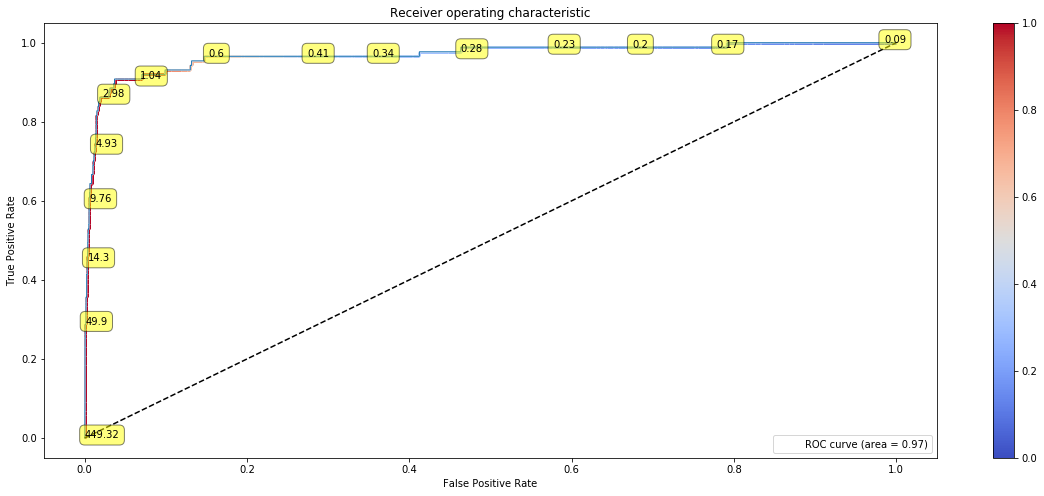

In [143]:
get_plot_roc_thres(tpr,fpr,thres, label_every=25)



The plot above shows the different threshold: we can observe that the decision of which is the right threshold to select highly influences the outcome. In fact, if we select a threshold such as, for example, 0.09, we will catch all the fraudulent transactions, but the downside is that we will also have a high percentage of false positives, which are normal transactions that are considered to be fraudulent and therefore need to be reviewed by human resources. In our example, where we consider the available resources of a small company, this case could not be take into consideration: it would need many employees weeks or even months to review all the incorrectly classified transactions.

This is why we consider setting the correct threshold is more of a "business decision", because it is indispensable to decide  whether it is more valuable to minimize false positive rate (allowing the misclassification of some TN -frauds), or maximize the true positive rate (allowing the identification of many FP -cases of misclassified normal transactions which have to be reviewed by human resources). 

**In our example:**
>From the plot below, we can clearly see that the optimal threshold has to be found between 6.28 and 9.32: this allow us to have a false positive rate close to 0 and a true positive rate higher than 60%. The selected threshold leads to an AUC of 97%, which we can consider very satisfying.

### TRADE-OFF:
Choosing a low threshold e.g. 0.6
We will catch the majority of fraud cases, but also +15000 non-fraudulent cases. 


#### <span style="color:GREEN">How do we get the best outcome?
</span>



 Evaluation 
 --------------------------------------------------------------------------- 



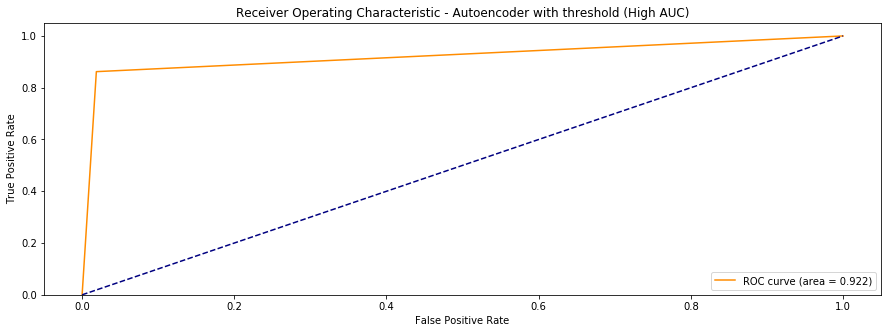

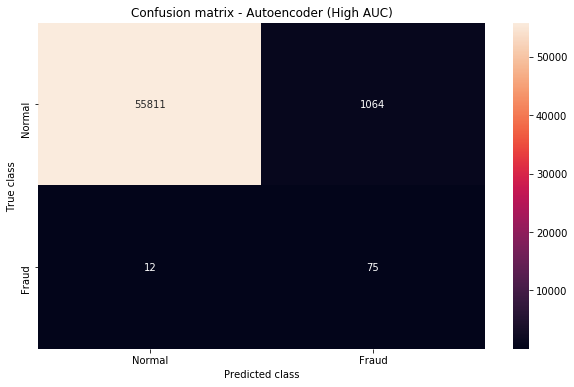

In [240]:
# set threshold
threshold_high = 3.482

# list comprehension: assigning a class 0/1 w.r.t.threshold
y_pred_autoenc_high = [1 if i > threshold_high else 0 for i in test_batch_mse]

# call functions
print("\n","Evaluation","\n",str("---------------")*5,"\n")
#get_evaluation_stats(test_y_autoenc, y_pred_autoenc)
get_plot_ROC(test_y_autoenc, y_pred_autoenc_high, 'Autoencoder with threshold (High AUC)')
get_confusion_matrix(test_y_autoenc, y_pred_autoenc_high, 'Autoencoder (High AUC)')



 Evaluation 
 --------------------------------------------------------------------------- 



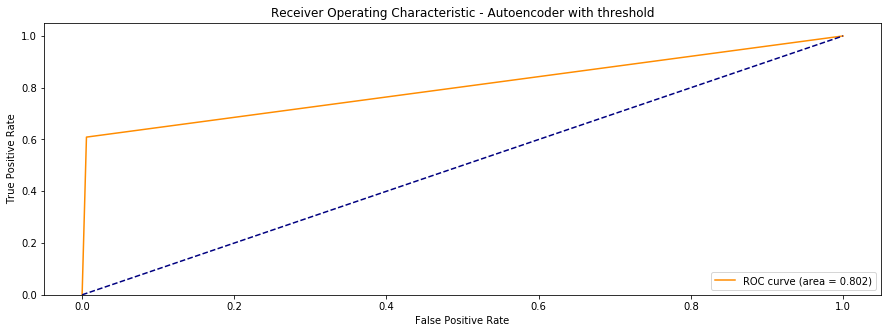

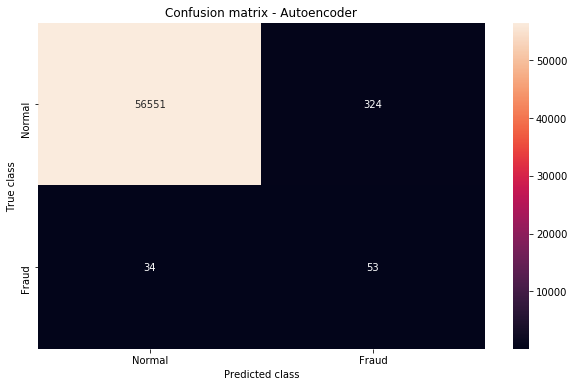

In [247]:
# set threshold
threshold = 9.69 

# list comprehension: assigning a class 0/1 w.r.t.threshold
y_pred_autoenc_low = [1 if i > threshold else 0 for i in test_batch_mse]

# call functions
print("\n","Evaluation","\n",str("---------------")*5,"\n")
#get_evaluation_stats(test_y_autoenc, y_pred_autoenc)
get_plot_ROC(test_y_autoenc, y_pred_autoenc_low, 'Autoencoder with threshold')
get_confusion_matrix(test_y_autoenc, y_pred_autoenc_low, 'Autoencoder')


> The confusion matrix presents the ratio of the true and predicted classes.

>We can see that we correctly classify: 
- 56551 normal transactions (TP)
- 53 fraudolent transactions (TN) 

>We incorrectly classify:
- 34 frauds, which are predicted as normal transactions
- 324 normal transactions which are predicted to be fraud. 

In this case, the transactions that will require human revision are the 360 false negative, while we misclassify 42 frauds.

We believed that, regarding our practical example, the optimal threshold choice is: threshold = 9.69. With this threshold, in fact, we managed to correctly catch 53 fraudulent transactions, 56551 normal transactions and only 324 misclassified transactions will be reviewed by human resources. We did misclassified 34 fraud cases, but we believe that a small company would rather misclassify few more example of fraudulent transactions that have to review 1064 cases, such as in the example above, where threshold_high = 3.482.

### PLOT OF DATA POINTS AND THRESHOLD BOUNDARY
*Visualizing the threshold and the datapoints of 20 000 transactions.*


 Plotting full scale... 



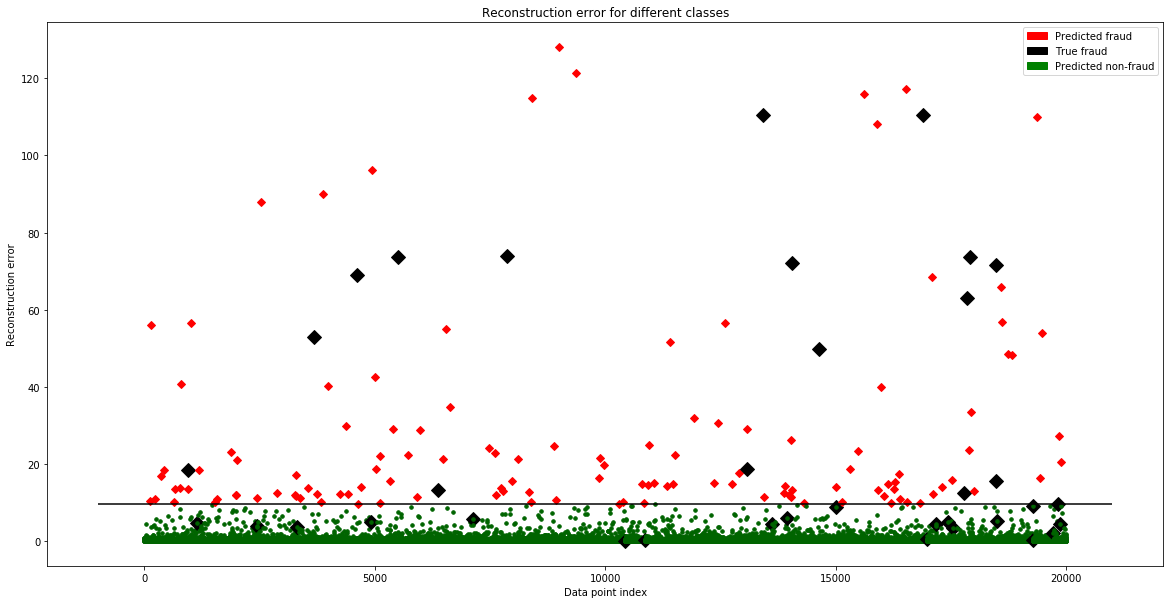


 Plotting zoomed scale... 



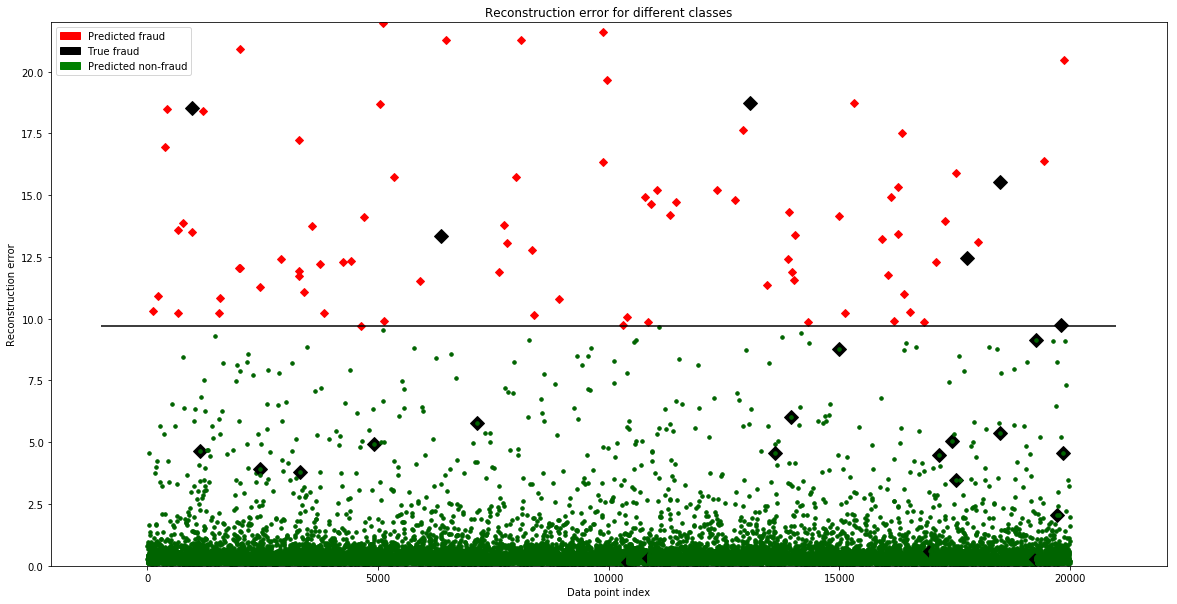

In [250]:
# set data point for plot
data_points_to_plot = 20000

def plot_dist_thres(datapoints):
    ''' function for plotting '''
    
    ##################
    ### full scale ###
    ##################
    
    fig, ax = plt.subplots(figsize=(20,10))
    print('\n','Plotting full scale...','\n')

    itr = -1 # idx counter
    for i in y_pred_autoenc_low[0:datapoints]:
        itr += 1
        
        if i == 1: # if predicted fraud
            ax.plot(itr, test_batch_mse[itr], marker='D', ms=5, linestyle='',
                    label= "Fraud" , color='red')

        if list(test_y_autoenc)[itr] == 1: # if true fraud
            ax.plot(itr, test_batch_mse[itr], marker='D', ms=10, linestyle='',
                    label= "Fraud" , color='black')
            
        if i == 0: # if predicted non-fraud
            ax.plot(itr, test_batch_mse[itr], marker='o', ms=3.5, linestyle='',
                label= "Normal", color='darkgreen')
            
        else:
            pass

    # threshold bar
    ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="black", zorder=100, label='Threshold')
    
    # patches
    red_patch = mpatches.Patch(color='red', label='Predicted fraud')
    black_patch = mpatches.Patch(color='black', label='True fraud')
    gren_patch = mpatches.Patch(color='green', label='Predicted non-fraud')
    plt.legend(handles=[red_patch, black_patch, gren_patch])

    # plot text
    plt.title("Reconstruction error for different classes")
    plt.ylabel("Reconstruction error"); plt.xlabel("Data point index")
    plt.savefig("Autoencoder - Threshold (full plot).png")
    plt.show();

    ###################
    ### zoomed plot ###
    ###################
    
    print('\n','Plotting zoomed scale...','\n')
    fig, ax = plt.subplots(figsize=(20,10))

    itr = -1 # idx counter
    for i in y_pred_autoenc_low[0:datapoints]:
        itr += 1
        
        if i == 1: # if predicted fraud
            ax.plot(itr, test_batch_mse[itr], marker='D', ms=5, linestyle='',
                    label= "Fraud" , color='red')

        if list(test_y_autoenc)[itr] == 1: # if true fraud
            ax.plot(itr, test_batch_mse[itr], marker='D', ms=10, linestyle='',
                    label= "Fraud" , color='black')
            
        if i == 0: # if predicted non-fraud
            ax.plot(itr, test_batch_mse[itr], marker='o', ms=3.5, linestyle='',
                label= "Normal", color='darkgreen')
        
        else:
            pass

    # threshold bar
    ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="black", zorder=100, label='Threshold')
    
    # set zoom
    plt.ylim([0,22])

    # patches
    red_patch = mpatches.Patch(color='red', label='Predicted fraud')
    black_patch = mpatches.Patch(color='black', label='True fraud')
    gren_patch = mpatches.Patch(color='green', label='Predicted non-fraud')
    plt.legend(handles=[red_patch, black_patch, gren_patch])

    # plot text
    plt.title("Reconstruction error for different classes")
    plt.ylabel("Reconstruction error"); plt.xlabel("Data point index")
    plt.savefig("Autoencoder - Threshold (zoomed plot).png")
    plt.show();

# call function
plot_dist_thres(data_points_to_plot)

**Above we have visualized 20 000 out of 56 962 data points from the test set to illustrate the threshold boundary. The threshold is set to 9.69**


> What we can see is all data points above **the threshold** are classified to be anomalies (predicted fraud) and data points below to be within the normal (predicted non-fraud). 


The plot shows that there is no perfect classification into fraud and non-fraud cases, but the reconstruction error is visibly higher for fraudulent transactions than for regular ones.

Outlier instances can be identified by applying a reconstruction error threshold. In our case, we consider every instance with reconstruction error > 10 to be anomaly/ outlier [32].

We see that **the reconstruction error** ranges from 0 to a little more than 120. There is some overlapping between the fraudulent transactions and the normal non-fraudulent transactions. 


>*Below the threshold, we have: *
> - #### <span style="color:green">56551 normal transactions </span> 


> - **34 fraudulent transaction**

>*Above the threshold, we have:*
> - **53 fraudulent transaction**
> - #### <span style="color:red">324 normal transactions</span>

**The hypothesis** holds to be true. 
> Generally, normal transactions have a low reconstruction error and fraudulent transactions have a high reconstruction error. 

With that said, it is not a clean decision, but in these cases its difficult if not impossible to get the clean fit. It's important not to overfit to the problem and to keep a model that will generalize well on out-of-sample. It will be a constant trade-off calibration. 

**How could we improve and catch the more difficult cases?**
> In order to catch the fraudulent transaction with a low reconstruction error we most likely need more information. The enrichment could be more sequential patterns to investigate (behaviour/ purchasing habits), a time series (spending patterns), geographical information about the transaction and so on. 

## POTENTIAL FRAUD CASES
> *Below we have printed the potential fraud cases that we have discussed in this subsection.*

#### THOUGHTS ON FRAUD INVESTIGATION

> **Let’s assume a company** only has resources to assign 3 employees for one week on 
the investigation of frauds.

> **Facts on process:** It takes 1 hour for 1 employee to investigate 4 cases.

> - We have a total of 377 cases to investigate.

> - It will take each employee 31.4 hours per.

> > Investigating the 377 cases will take 3 employees a week of work. We assumed that they each will be able to investigate 4 cases per hour, corresponding to a total of 31.4 hours per employee to catch the 53 fraud cases.


**The below examples are what one would pass on to further investigation.**



In [251]:
List_ = []
idx = -1
for i in y_pred_autoenc_low:
    idx += 1
    
    if i == 1:
        List_.append(('ID',idx,test_x_autoenc[idx]))
    else:
        pass 

print("We found:", len(List_), " cases for further investigation \n")
List_[0:5]

We found: 377  cases for further investigation 



[('ID', 120, array([  0.55175883,  -2.17682734,   0.34045479,  -0.01606152,
           0.95403795,  -1.52079704,   1.59019591,  -0.86204584,
          -6.06141582,   0.59956739,   0.48818283,   0.76327062,
           0.19943172,  -2.09499683,   0.84395451,   0.74451663,
           0.89422424,   0.12226018,   0.44826087,   1.05747224,
          -5.41269589,   6.9799578 ,  -4.72498075, -10.13270102,
           0.64046937,  -2.19636516,  -1.38770662,   5.65145566,
          -1.35434459,   4.33860645])),
 ('ID', 155, array([  0.24165762,  -8.79527419, -10.67956029,  -1.88377878,
           6.72517835,   6.27575482,  -2.48724775,   0.52934763,
          -2.29595133,   1.91796203,   4.39868644,   2.3640093 ,
          -3.19432773,   3.57303096,  -0.34343153,   1.88823803,
           2.65023151,  -1.67290819,   0.51362705,   5.12405973,
         -19.86725672,  -7.64042565,   5.23745494,  20.00588569,
           0.99962683,   5.3302564 ,   2.9613157 ,  17.26389896,
         -11.62794021,   0.7

# References

[1] The Nilson Report. Available at: https://www.nilsonreport.com/upload/content_promo/The_Nilson_Report_10-17-2016.pdf [Accessed 20/12/2017].

[2] Leveraging Deep Learning for Fraud Detection by Pankaj Goyal, Vice President, AI Business & Data Center Strategy, Hewlett Packard Enterprise. Available at: https://www.hpcwire.com/solution_content/hpe/financial-services/leveraging-deep-learning-fraud-detection/  [Accessed 20/11/2017].

[3] Chandola, V., Banerjee, A., and Kumar, V. 2009. Anomaly detection: A survey. ACM computing surveys (CSUR), 41(3), 15.

[4] Kaggle: Credit Card Fraud Detection. Available at:  https://www.kaggle.com/dalpozz/creditcardfraud  [Accessed 15/11/2017].

[5] Provost, F., Fawcett, T. 1997. Analysis and visualization of classifier performance: Comparison under imprecise class and cost distributions. In: Proc. Third Internat. Conf. on Knowledge Discovery and Data Mining (KDD-97). AAAI Press, Menlo Park, CA, pp. 43–48. 

[6] Provost, F., Fawcett, T. 1998. Robust classification systems for imprecise environments. In: Proc. AAAI-98. AAAI Press, Menlo Park, CA, pp. 706–713.

[7] Fawcett, T. 2005. An introduction to ROC analysis Tom Fawcett Institute for the Study of Learning and Expertise, 2164 Staunton Court, Palo Alto, CA 94306, USA 

[8] Egan, J.P. 1975. Signal detection theory and ROC analysis, Series in Cognition and Perception. Academic Press, New York. 

[9] Swets, J.A., Dawes, R.M., Monahan, J. 2000. Better decisions through science. Scientific American 283, 82–87.

[10] Chawla et al. 2002. SMOTE: Synthetic Minority Over-sampling Technique. Journal of Artificial Intelligence Research 16 (2002) 321–357.

[11] Kaggle: Semi-Supervised Anomaly Detection Survey by Matheus Facure. Available at: https://www.kaggle.com/matheusfacure/semi-supervised-anomaly-detection-survey [Accessed 1/11/2017].

[12] Cyrille Rossant. 2015. An illustrated introduction to the t-SNE algorithm. Available at: https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm [Accessed 10/12/2017].

[13] Hinton, G. and Roweis, S. 2002. Stochastic Neighbor Embedding

[14] Sklearn: Logistic Regression. Available at: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html [Accessed 15/09/2017].

[15] Goodfellow et al. 2016. DeepLearningBook. Available at: http://www.deeplearningbook.org/contents/part_practical.html [Accessed 10/09/2017].

[16] Cybenko, G. 1989. Math. Control Signal Systems, 2: 303-314: Approximation by Superpositions of a Sigmoidal Function. 

[17] Pazzani, M., Merz, C., Murphy, P., Ali, K., Hume, T., and Brunk, C. 1994. Reducing Misclassification Costs. In Proceedings of the Eleventh International Conference on Machine Learning San Francisco, CA. Morgan Kauffmann.

[18] Domingos, P. 1999. Metacost: A General Method for Making Classifiers Cost-sensitive. In Proceedings of the Fifth ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, pp. 155–164 San Diego, CA. ACM Press.

[19] Yun-chung Liu, A. 2004. The Effect of Oversampling and Undersampling on Classifying Imbalanced Text Datasets.
Available at: https://pdfs.semanticscholar.org/cade/435c88610820f073a0fb61b73dff8f006760.pdf [Accessed 16/12/2017].

[20] Tensorflow: AdamOptimizer. Available at: https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer [Accessed 15/09/2017].

[21] Elhassan T., Aljurf M., Al-Mohanna F., and Shoukri M. 2016. Classification of Imbalance Data using Tomek Link (T-Link) Combined with Random Under-sampling (RUS) as a Data Reduction Method. Available at: http://datamining.imedpub.com/classification-of-imbalance-data-using-tomek-linktlink-combined-with-random-undersampling-rus-as-a-data-reduction-method.pdf  [Accessed 16/12/2017].

[22] The Right Way to Oversample in Predictive Modeling by Nick Becker. Available at: https://beckernick.github.io/oversampling-modeling/  [Accessed 15/11/2017].

[23] Kubat, M., Matwin, S. 1997. Addressing the Curse of Imbalanced Data Sets: One-Sided Sampling, in
Proceedings of the Fourteenth International Conference on Machine Learning , pp. 179-186. 

[24] Imbalanced-learn: Combination of over- and under-sampling. Available at: http://contrib.scikit-learn.org/imbalanced-learn/stable/combine.html#combine [Accessed 15/11/2017].

[25] Imbalanced-learn: Comparison of the combination of over- and under-sampling algorithms. Available at: http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/combine/plot_comparison_combine.html#sphx-glr-auto-examples-combine-plot-comparison-combine-py [Accessed 15/11/2017].

[26] More, A. 2016. Survey of resampling techniques for improving classification performance in unbalanced datasets.
Available at: https://arxiv.org/pdf/1608.06048.pdf [Accessed 15/11/2017].

[27]  Handling imbalanced dataset in supervised learning using family of SMOTE algorithm by Rohit Walimbe, 2017. Available at: https://www.datasciencecentral.com/profiles/blogs/handling-imbalanced-data-sets-in-supervised-learning-using-family [Accessed 15/11/2017].

[28] Hinton, G. E. and Salakhutdinov, R. R. 2006. Reducing the Dimensionality of Data with Neural Networks
Available at: https://www.cs.toronto.edu/~hinton/science.pdf [Accessed 20/11/2017].

[29] GitHub: Weimin Wang. Available at: https://github.com/aaxwaz/Fraud-detection-using-deep-learning [Accessed 15/11/2017].

[30] GitHub: Aymeric Damien. Available at: https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/autoencoder.py [Accessed 15/11/2017].

[31] Hinton, G., (N/A). Neural Networks for Machine Learning: Overview of mini-batch gradient	descent. Available at: https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf [Accessed 21/11/2017].

[31] Autoencoders and anomaly detection with machine learning in fraud analytics, 2017. Available at: https://shiring.github.io/machine_learning/2017/05/01/fraud [Accessed 29/12/2017].